# Data Scientist Working Pre-test MediaWave (Stocks Analysis) 
# Christianto Octiandi

In [1]:
# Import Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

Importing plotly failed. Interactive plots will not work.


In [2]:
# Read Data
from pathlib import Path
import glob
source_files = sorted(Path('D:\PROJECT\MEDIAWAVE STOCK').glob('*.csv'))

dataframes = []
for file in source_files:
    df = pd.read_csv(file)
    df['Emiten'] = file.name[0:4]
    dataframes.append(df)

df_all = pd.concat(dataframes)

In [3]:
Stocks=df_all[['Date','Close','Emiten']]
print('\033[1m Data Info\033[0m')
print(Stocks.info())

 Data Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104599 entries, 0 to 1156
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    104599 non-null  object 
 1   Close   101026 non-null  float64
 2   Emiten  104599 non-null  object 
dtypes: float64(1), object(2)
memory usage: 3.2+ MB
None


In [4]:
# Change Date data type from object to datetime
Stocks['Date']=pd.to_datetime(Stocks['Date'], format='%Y-%m-%d', errors='coerce')

In [5]:
print('\033[1m Data Info\033[0m')
print(Stocks.info())

 Data Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104599 entries, 0 to 1156
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    104599 non-null  datetime64[ns]
 1   Close   101026 non-null  float64       
 2   Emiten  104599 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.2+ MB
None


In [6]:
Stocks.Emiten.value_counts()

INDF    4235
ICBP    4235
ASII    4224
INTP    4188
AALI    4102
GGRM    4057
HMSP    3979
LSIP    3830
SMRA    3749
PTBA    3655
BMRI    3510
BBNI    3394
ADHI    3332
BBCA    3274
TLKM    3194
ANTM    2942
AKRA    2942
SMGR    2942
INCO    2942
LPKR    2942
BUMI    2942
CPIN    2942
MNCN    2501
WIKA    2414
JSMR    2404
ASRI    2378
ELSA    2349
BSDE    2271
MYRX    2074
BBTN    1896
PTPP    1863
PWON    1746
WSKT    1157
SRIL    1038
SSMS     918
PGAS     781
PPRO     570
UNVR     561
ADRO      18
SCMA      18
LPPF      18
BBRI      18
UNTR      18
KLBF      18
EXCL      18
Name: Emiten, dtype: int64

In [7]:
# Drop stocks with very few data
df=Stocks.drop(Stocks.index[Stocks['Emiten'].isin(['ADRO','SCMA','LPPF','BBRI','UNTR','KLBF','EXCL'])])
df.Emiten.value_counts()

INDF    4217
ICBP    4217
ASII    4206
INTP    4170
AALI    4084
GGRM    4039
HMSP    3961
LSIP    3812
SMRA    3731
PTBA    3637
BMRI    3492
BBNI    3376
ADHI    3314
BBCA    3256
TLKM    3176
INCO    2924
AKRA    2924
LPKR    2924
ANTM    2924
CPIN    2924
BUMI    2924
SMGR    2924
MNCN    2483
WIKA    2396
JSMR    2386
ASRI    2360
ELSA    2331
BSDE    2253
MYRX    2056
BBTN    1878
PTPP    1845
PWON    1728
WSKT    1139
SRIL    1020
SSMS     900
PGAS     763
PPRO     552
UNVR     543
Name: Emiten, dtype: int64

In [8]:
# Drop missing value
df = df[df['Close'].notna()]
df.reset_index(drop=True,inplace=True)
df

,Date,Close,Emiten
0,2001-05-01,476.425995,AALI
1,2001-05-02,452.604004,AALI
2,2001-05-03,466.897003,AALI
3,2001-05-04,490.717987,AALI
4,2001-05-08,476.425995,AALI
...,...,...,...
100253,2017-08-31,2220.000000,WSKT
100254,2017-09-01,2220.000000,WSKT
100255,2017-09-04,2140.000000,WSKT
100256,2017-09-05,2100.000000,WSKT


In [9]:
df.Emiten.value_counts()

ICBP    4139
INDF    4138
ASII    4130
INTP    4111
GGRM    4026
AALI    4021
HMSP    3897
LSIP    3767
SMRA    3689
PTBA    3608
BMRI    3459
BBNI    3314
ADHI    3303
BBCA    3239
TLKM    3130
ANTM    2868
SMGR    2859
CPIN    2853
LPKR    2840
INCO    2838
AKRA    2735
MNCN    2464
WIKA    2379
JSMR    2368
ASRI    2341
ELSA    2314
BSDE    2235
MYRX    2056
BBTN    1867
PTPP    1836
PWON    1727
WSKT    1131
SRIL    1011
SSMS     890
BUMI     825
PGAS     763
PPRO     544
UNVR     543
Name: Emiten, dtype: int64

In [10]:
# Separate dataframe by Stocks
INDF=df[df['Emiten']=='INDF']
INDF.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
INDF.drop(['Emiten'],axis=1, inplace=True)
INDF.reset_index(drop=True,inplace=True)

ICBP=df[df['Emiten']=='ICBP']
ICBP.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
ICBP.drop(['Emiten'],axis=1, inplace=True)
ICBP.reset_index(drop=True,inplace=True)

ASII=df[df['Emiten']=='ASII']
ASII.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
ASII.drop(['Emiten'],axis=1, inplace=True)
ASII.reset_index(drop=True,inplace=True)

INTP=df[df['Emiten']=='INTP']
INTP.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
INTP.drop(['Emiten'],axis=1, inplace=True)
INTP.reset_index(drop=True,inplace=True)

AALI=df[df['Emiten']=='AALI']
AALI.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
AALI.drop(['Emiten'],axis=1, inplace=True)
AALI.reset_index(drop=True,inplace=True)

GGRM=df[df['Emiten']=='GGRM']
GGRM.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
GGRM.drop(['Emiten'],axis=1, inplace=True)
GGRM.reset_index(drop=True,inplace=True)

HMSP=df[df['Emiten']=='HMSP']
HMSP.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
HMSP.drop(['Emiten'],axis=1, inplace=True)
HMSP.reset_index(drop=True,inplace=True)

LSIP=df[df['Emiten']=='LSIP']
LSIP.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
LSIP.drop(['Emiten'],axis=1, inplace=True)
LSIP.reset_index(drop=True,inplace=True)

SMRA=df[df['Emiten']=='SMRA']
SMRA.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
SMRA.drop(['Emiten'],axis=1, inplace=True)
SMRA.reset_index(drop=True,inplace=True)

PTBA=df[df['Emiten']=='PTBA']
PTBA.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
PTBA.drop(['Emiten'],axis=1, inplace=True)
PTBA.reset_index(drop=True,inplace=True)

BMRI=df[df['Emiten']=='BMRI']
BMRI.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
BMRI.drop(['Emiten'],axis=1, inplace=True)
BMRI.reset_index(drop=True,inplace=True)

BBNI=df[df['Emiten']=='BBNI']
BBNI.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
BBNI.drop(['Emiten'],axis=1, inplace=True)
BBNI.reset_index(drop=True,inplace=True)

ADHI=df[df['Emiten']=='ADHI']
ADHI.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
ADHI.drop(['Emiten'],axis=1, inplace=True)
ADHI.reset_index(drop=True,inplace=True)

BBCA=df[df['Emiten']=='BBCA']
BBCA.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
BBCA.drop(['Emiten'],axis=1, inplace=True)
BBCA.reset_index(drop=True,inplace=True)

TLKM=df[df['Emiten']=='TLKM']
TLKM.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
TLKM.drop(['Emiten'],axis=1, inplace=True)
TLKM.reset_index(drop=True,inplace=True)

INCO=df[df['Emiten']=='INCO']
INCO.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
INCO.drop(['Emiten'],axis=1, inplace=True)
INCO.reset_index(drop=True,inplace=True)

AKRA=df[df['Emiten']=='AKRA']
AKRA.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
AKRA.drop(['Emiten'],axis=1, inplace=True)
AKRA.reset_index(drop=True,inplace=True)

LPKR=df[df['Emiten']=='LPKR']
LPKR.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
LPKR.drop(['Emiten'],axis=1, inplace=True)
LPKR.reset_index(drop=True,inplace=True)

ANTM=df[df['Emiten']=='ANTM']
ANTM.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
ANTM.drop(['Emiten'],axis=1, inplace=True)
ANTM.reset_index(drop=True,inplace=True)

CPIN=df[df['Emiten']=='CPIN']
CPIN.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
CPIN.drop(['Emiten'],axis=1, inplace=True)
CPIN.reset_index(drop=True,inplace=True)

BUMI=df[df['Emiten']=='BUMI']
BUMI.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
BUMI.drop(['Emiten'],axis=1, inplace=True)
BUMI.reset_index(drop=True,inplace=True)

SMGR=df[df['Emiten']=='SMGR']
SMGR.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
SMGR.drop(['Emiten'],axis=1, inplace=True)
SMGR.reset_index(drop=True,inplace=True)

MNCN=df[df['Emiten']=='MNCN']
MNCN.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
MNCN.drop(['Emiten'],axis=1, inplace=True)
MNCN.reset_index(drop=True,inplace=True)

WIKA=df[df['Emiten']=='WIKA']
WIKA.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
WIKA.drop(['Emiten'],axis=1, inplace=True)
WIKA.reset_index(drop=True,inplace=True)

JSMR=df[df['Emiten']=='JSMR']
JSMR.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
JSMR.drop(['Emiten'],axis=1, inplace=True)
JSMR.reset_index(drop=True,inplace=True)

ASRI=df[df['Emiten']=='ASRI']
ASRI.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
ASRI.drop(['Emiten'],axis=1, inplace=True)
ASRI.reset_index(drop=True,inplace=True)

ELSA=df[df['Emiten']=='ELSA']
ELSA.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
ELSA.drop(['Emiten'],axis=1, inplace=True)
ELSA.reset_index(drop=True,inplace=True)

BSDE=df[df['Emiten']=='BSDE']
BSDE.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
BSDE.drop(['Emiten'],axis=1, inplace=True)
BSDE.reset_index(drop=True,inplace=True)

MYRX=df[df['Emiten']=='MYRX']
MYRX.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
MYRX.drop(['Emiten'],axis=1, inplace=True)
MYRX.reset_index(drop=True,inplace=True)
MYRX['y']=MYRX['y']*1000

BBTN=df[df['Emiten']=='BBTN']
BBTN.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
BBTN.drop(['Emiten'],axis=1, inplace=True)
BBTN.reset_index(drop=True,inplace=True)

PTPP=df[df['Emiten']=='PTPP']
PTPP.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
PTPP.drop(['Emiten'],axis=1, inplace=True)
PTPP.reset_index(drop=True,inplace=True)

WIKA=df[df['Emiten']=='WIKA']
WIKA.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
WIKA.drop(['Emiten'],axis=1, inplace=True)
WIKA.reset_index(drop=True,inplace=True)

PWON=df[df['Emiten']=='PWON']
PWON.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
PWON.drop(['Emiten'],axis=1, inplace=True)
PWON.reset_index(drop=True,inplace=True)
PWON['y']=PWON['y']*1000

WSKT=df[df['Emiten']=='WSKT']
WSKT.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
WSKT.drop(['Emiten'],axis=1, inplace=True)
WSKT.reset_index(drop=True,inplace=True)

SRIL=df[df['Emiten']=='SRIL']
SRIL.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
SRIL.drop(['Emiten'],axis=1, inplace=True)
SRIL.reset_index(drop=True,inplace=True)

SSMS=df[df['Emiten']=='SSMS']
SSMS.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
SSMS.drop(['Emiten'],axis=1, inplace=True)
SSMS.reset_index(drop=True,inplace=True)

PGAS=df[df['Emiten']=='PGAS']
PGAS.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
PGAS.drop(['Emiten'],axis=1, inplace=True)
PGAS.reset_index(drop=True,inplace=True)
PGAS['y']=PGAS['y']*100000

PPRO=df[df['Emiten']=='PPRO']
PPRO.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
PPRO.drop(['Emiten'],axis=1, inplace=True)
PPRO.reset_index(drop=True,inplace=True)

UNVR=df[df['Emiten']=='UNVR']
UNVR.rename(columns={'Date': 'ds','Close': 'y'}, inplace=True)
UNVR.drop(['Emiten'],axis=1, inplace=True)
UNVR.reset_index(drop=True,inplace=True)
UNVR['y']=UNVR['y']*1000

# Forecasting

## ICBP Forecast

In [11]:
# ICBP Forecast
a = Prophet()
a.fit(ICBP)
futurea = a.make_future_dataframe(periods=1825)
forecasta = a.predict(futurea)
pd.concat([forecasta[['ds', 'yhat']].head(5), forecasta[['ds', 'yhat']].tail(5)])

08:54:42 - cmdstanpy - INFO - Chain [1] start processing
08:54:46 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2000-10-26,474.482677
1,2000-10-27,467.981206
2,2000-10-30,436.335282
3,2000-10-31,430.238620
4,2000-11-01,425.364016
5959,2022-09-01,15313.493640
5960,2022-09-02,15321.236456
5961,2022-09-03,15307.530841
5962,2022-09-04,15314.847996
5963,2022-09-05,15333.439572


In [12]:
# ICBP Gain/Loss Forecast
ICBP_3Months = (forecasta.iloc[4228]['yhat'] - ICBP.iloc[4138]['y'])/ICBP.iloc[4138]['y']*100
ICBP_1Year = (forecasta.iloc[4503]['yhat'] - ICBP.iloc[4138]['y'])/ICBP.iloc[4138]['y']*100
ICBP_5Year = (forecasta.iloc[5963]['yhat'] - ICBP.iloc[4138]['y'])/ICBP.iloc[4138]['y']*100
print('3 Month ICBP = '+ f'{ICBP_3Months}' +'%')
print('1 Year ICBP = '+ f'{ICBP_1Year}' +'%')
print('5 Year ICBP = '+ f'{ICBP_5Year}' +'%')

3 Month ICBP = 8.250391095628421%
1 Year ICBP = 19.88003077255292%
5 Year ICBP = 74.74005209940412%


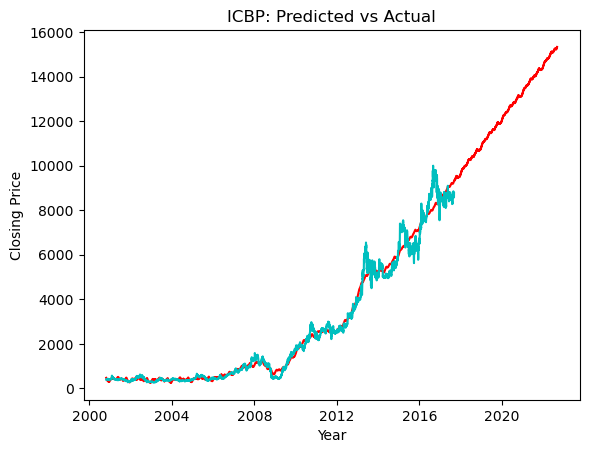

In [13]:
plt.plot(forecasta['ds'], forecasta['yhat'], 'r')
plt.plot(ICBP['ds'], ICBP['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("ICBP: Predicted vs Actual")
plt.show()

## INDF Forecast

In [14]:
# INDF Forecast
b = Prophet()
b.fit(INDF)
futureb = b.make_future_dataframe(periods=1825)
forecastb = b.predict(futureb)
pd.concat([forecastb[['ds', 'yhat']].head(5), forecastb[['ds', 'yhat']].tail(5)])

08:54:49 - cmdstanpy - INFO - Chain [1] start processing
08:54:53 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2000-10-26,879.597032
1,2000-10-27,871.136795
2,2000-10-30,821.700231
3,2000-10-31,804.917020
4,2000-11-01,799.851767
5958,2022-09-01,10002.097737
5959,2022-09-02,10005.119485
5960,2022-09-03,9959.630323
5961,2022-09-04,9962.468970
5962,2022-09-05,9999.442267


In [15]:
# INDF Gain/Loss Forecast
INDF_3Months = (forecastb.iloc[4227]['yhat'] - INDF.iloc[4137]['y'])/INDF.iloc[4137]['y']*100
INDF_1Year = (forecastb.iloc[4502]['yhat'] - INDF.iloc[4137]['y'])/INDF.iloc[4137]['y']*100
INDF_5Year = (forecastb.iloc[5962]['yhat'] - INDF.iloc[4137]['y'])/INDF.iloc[4137]['y']*100
print('3 Month INDF = '+ f'{INDF_3Months}' +'%')
print('1 Year INDF = '+ f'{INDF_1Year}' +'%')
print('5 Year INDF = '+ f'{INDF_5Year}' +'%')

3 Month INDF = -6.335726940530155%
1 Year INDF = -0.4742824627027227%
5 Year INDF = 19.396325577957683%


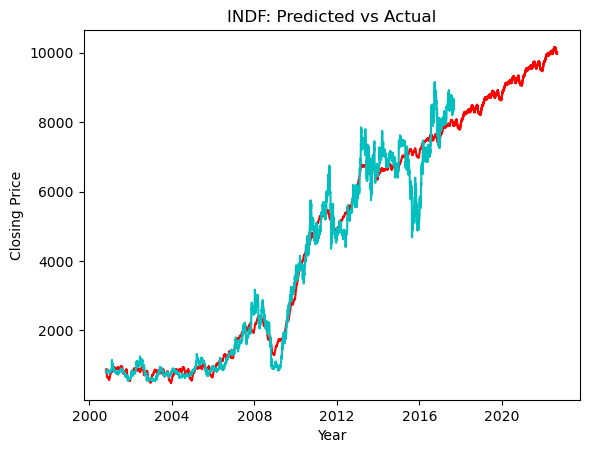

In [16]:
plt.plot(forecastb['ds'], forecastb['yhat'], 'r')
plt.plot(INDF['ds'], INDF['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("INDF: Predicted vs Actual")
plt.show()

## ASII Forecast

In [17]:
# ASII Forecast
c = Prophet()
c.fit(ASII)
futurec = c.make_future_dataframe(periods=1825)
forecastc = c.predict(futurec)
pd.concat([forecastc[['ds', 'yhat']].head(5), forecastc[['ds', 'yhat']].tail(5)])

08:54:55 - cmdstanpy - INFO - Chain [1] start processing
08:54:59 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2000-11-10,135.749567
1,2000-11-13,117.755542
2,2000-11-14,114.366302
3,2000-11-15,123.714423
4,2000-11-16,120.567870
5950,2022-09-01,9647.005764
5951,2022-09-02,9649.626084
5952,2022-09-03,9682.370117
5953,2022-09-04,9685.677085
5954,2022-09-05,9649.642457


In [18]:
# ASII Gain/Loss Forecast
ASII_3Months = (forecastc.iloc[4219]['yhat'] - ASII.iloc[4129]['y'])/ASII.iloc[4129]['y']*100
ASII_1Year = (forecastc.iloc[4494]['yhat'] - ASII.iloc[4129]['y'])/ASII.iloc[4129]['y']*100
ASII_5Year = (forecastc.iloc[5954]['yhat'] - ASII.iloc[4129]['y'])/ASII.iloc[4129]['y']*100
print('3 Month ASII = '+ f'{ASII_3Months}' +'%')
print('1 Year ASII = '+ f'{ASII_1Year}' +'%')
print('5 Year ASII = '+ f'{ASII_5Year}' +'%')

3 Month ASII = 2.389677953320666%
1 Year ASII = 6.011023960380375%
5 Year ASII = 23.318114466257246%


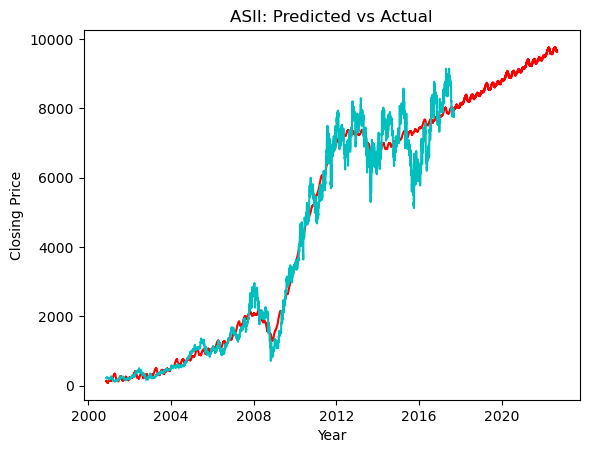

In [19]:
plt.plot(forecastc['ds'], forecastc['yhat'], 'r')
plt.plot(ASII['ds'], ASII['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("ASII: Predicted vs Actual")
plt.show()

## INTP Forecast

In [20]:
# INTP Forecast
d = Prophet()
d.fit(INTP)
futured = d.make_future_dataframe(periods=1825)
forecastd = d.predict(futured)
pd.concat([forecastd[['ds', 'yhat']].head(5), forecastd[['ds', 'yhat']].tail(5)])

08:55:02 - cmdstanpy - INFO - Chain [1] start processing
08:55:06 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2001-01-02,1495.830267
1,2001-01-03,1521.712405
2,2001-01-04,1486.121837
3,2001-01-05,1488.923406
4,2001-01-08,1441.253389
5931,2022-09-01,3951.151897
5932,2022-09-02,3945.049559
5933,2022-09-03,4102.134968
5934,2022-09-04,4081.476625
5935,2022-09-05,3879.086371


In [21]:
# INTP Gain/Loss Forecast
INTP_3Months = (forecastd.iloc[4200]['yhat'] - INTP.iloc[4110]['y'])/INTP.iloc[4110]['y']*100
INTP_1Year = (forecastd.iloc[4475]['yhat'] - INTP.iloc[4110]['y'])/INTP.iloc[4110]['y']*100
INTP_5Year = (forecastd.iloc[5935]['yhat'] - INTP.iloc[4110]['y'])/INTP.iloc[4110]['y']*100
print('3 Month INTP = '+ f'{INTP_3Months}' +'%')
print('1 Year INTP = '+ f'{INTP_1Year}' +'%')
print('5 Year INTP = '+ f'{INTP_5Year}' +'%')

3 Month INTP = -19.242759363967433%
1 Year INTP = -28.116278037617885%
5 Year INTP = -79.14469693015774%


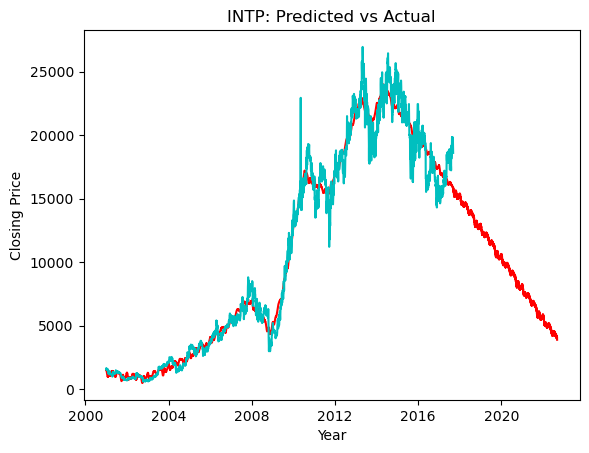

In [22]:
plt.plot(forecastd['ds'], forecastd['yhat'], 'r')
plt.plot(INTP['ds'], INTP['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("INTP: Predicted vs Actual")
plt.show()

## GGRM Forecast

In [23]:
# GGRM Forecast
e = Prophet()
e.fit(GGRM)
futuree = e.make_future_dataframe(periods=1825)
forecaste = e.predict(futuree)
pd.concat([forecaste[['ds', 'yhat']].head(5), forecaste[['ds', 'yhat']].tail(5)])

08:55:09 - cmdstanpy - INFO - Chain [1] start processing
08:55:12 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2001-07-03,12413.367761
1,2001-07-04,12443.313477
2,2001-07-05,12513.826571
3,2001-07-06,12609.684337
4,2001-07-09,12630.347843
5846,2022-09-01,103851.211637
5847,2022-09-02,103911.530824
5848,2022-09-03,104667.031647
5849,2022-09-04,104668.258375
5850,2022-09-05,103826.975819


In [24]:
# GGRM Gain/Loss Forecast
GGRM_3Months = (forecaste.iloc[4115]['yhat'] - GGRM.iloc[4025]['y'])/GGRM.iloc[4025]['y']*100
GGRM_1Year = (forecaste.iloc[4390]['yhat'] - GGRM.iloc[4025]['y'])/GGRM.iloc[4025]['y']*100
GGRM_5Year = (forecaste.iloc[5850]['yhat'] - GGRM.iloc[4025]['y'])/GGRM.iloc[4025]['y']*100
print('3 Month GGRM = '+ f'{GGRM_3Months}' +'%')
print('1 Year GGRM = '+ f'{GGRM_1Year}' +'%')
print('5 Year GGRM = '+ f'{GGRM_5Year}' +'%')

3 Month GGRM = 8.426586802926348%
1 Year GGRM = 14.605908267372456%
5 Year GGRM = 55.66263241157745%


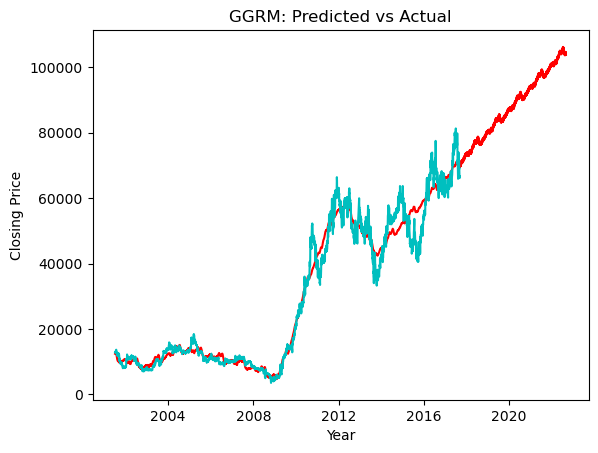

In [25]:
plt.plot(forecaste['ds'], forecaste['yhat'], 'r')
plt.plot(GGRM['ds'], GGRM['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("GGRM: Predicted vs Actual")
plt.show()

## AALI Forecast

In [26]:
# AALI Forecast
f = Prophet()
f.fit(AALI)
futuref = f.make_future_dataframe(periods=1825)
forecastf = f.predict(futuref)
pd.concat([forecastf[['ds', 'yhat']].head(5), forecastf[['ds', 'yhat']].tail(5)])

08:55:14 - cmdstanpy - INFO - Chain [1] start processing
08:55:19 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2001-05-01,1341.063834
1,2001-05-02,1358.624665
2,2001-05-03,1350.711122
3,2001-05-04,1341.448211
4,2001-05-08,1262.113748
5841,2022-09-01,-5177.634874
5842,2022-09-02,-5186.339892
5843,2022-09-03,-5543.829031
5844,2022-09-04,-5554.628991
5845,2022-09-05,-5225.074194


In [27]:
# AALI Gain/Loss Forecast
AALI_3Months = (forecastf.iloc[4110]['yhat'] - AALI.iloc[4020]['y'])/AALI.iloc[4020]['y']*100
AALI_1Year = (forecastf.iloc[4385]['yhat'] - AALI.iloc[4020]['y'])/AALI.iloc[4020]['y']*100
#Stock price cannot be of minus value, so I'm using 1 value instead if the model gives a negative value.
AALI_5Year = (1 - AALI.iloc[4020]['y'])/AALI.iloc[4020]['y']*100  
print('3 Month AALI = '+ f'{AALI_3Months}' +'%')
print('1 Year AALI = '+ f'{AALI_1Year}' +'%')
print('5 Year AALI = '+ f'{AALI_5Year}' +'%')

3 Month AALI = -19.76348650661577%
1 Year AALI = -40.962327445772324%
5 Year AALI = -99.99320882852291%


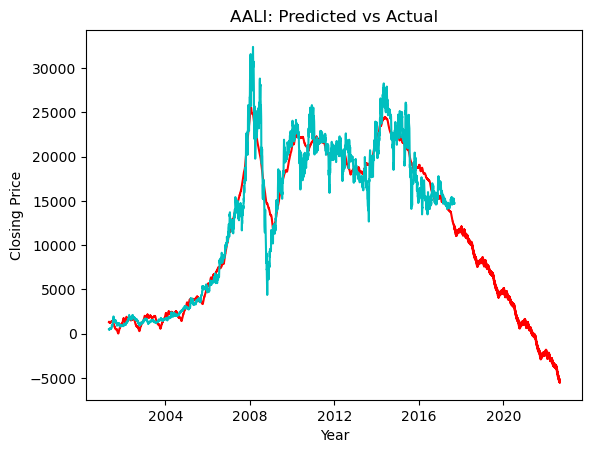

In [28]:
plt.plot(forecastf['ds'], forecastf['yhat'], 'r')
plt.plot(AALI['ds'], AALI['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("AALI: Predicted vs Actual")
plt.show()

## HMSP Forecast

In [29]:
# HMSP Forecast
g = Prophet()
g.fit(HMSP)
futureg = g.make_future_dataframe(periods=1825)
forecastg = g.predict(futureg)
pd.concat([forecastg[['ds', 'yhat']].head(5), forecastg[['ds', 'yhat']].tail(5)])

08:55:21 - cmdstanpy - INFO - Chain [1] start processing
08:55:25 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2001-10-19,103.530128
1,2001-10-22,106.495218
2,2001-10-23,110.674524
3,2001-10-24,109.545787
4,2001-10-25,114.497921
5717,2022-09-01,6820.849505
5718,2022-09-02,6819.722198
5719,2022-09-03,6820.289786
5720,2022-09-04,6823.237135
5721,2022-09-05,6827.810636


In [30]:
# HMSP Gain/Loss Forecast
HMSP_3Months = (forecastg.iloc[3986]['yhat'] - HMSP.iloc[3896]['y'])/HMSP.iloc[3896]['y']*100
HMSP_1Year = (forecastg.iloc[4261]['yhat'] - HMSP.iloc[3896]['y'])/HMSP.iloc[3896]['y']*100
HMSP_5Year = (forecastg.iloc[5721]['yhat'] - HMSP.iloc[3896]['y'])/HMSP.iloc[3896]['y']*100
print('3 Month HMSP = '+ f'{HMSP_3Months}' +'%')
print('1 Year HMSP = '+ f'{HMSP_1Year}' +'%')
print('5 Year HMSP = '+ f'{HMSP_5Year}' +'%')

3 Month HMSP = 20.014458835227664%
1 Year HMSP = 28.89322102626359%
5 Year HMSP = 86.55220317373069%


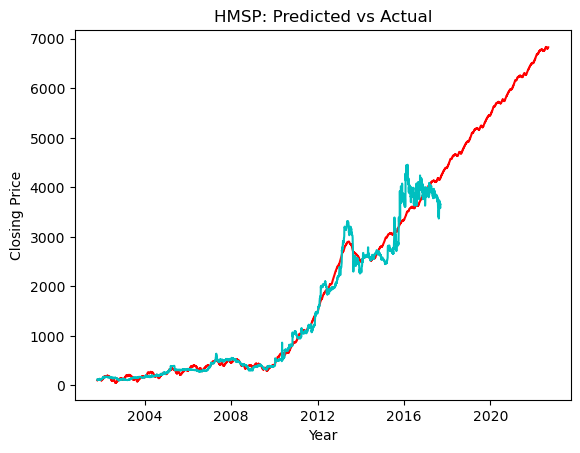

In [31]:
plt.plot(forecastg['ds'], forecastg['yhat'], 'r')
plt.plot(HMSP['ds'], HMSP['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("HMSP: Predicted vs Actual")
plt.show()

## LSIP Forecast

In [32]:
# LSIP Forecast
h = Prophet()
h.fit(LSIP)
futureh = h.make_future_dataframe(periods=1825)
forecasth = h.predict(futureh)
pd.concat([forecasth[['ds', 'yhat']].head(5), forecasth[['ds', 'yhat']].tail(5)])

08:55:28 - cmdstanpy - INFO - Chain [1] start processing
08:55:31 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2002-05-16,78.204064
1,2002-05-17,79.177851
2,2002-05-20,75.698345
3,2002-05-21,75.664691
4,2002-05-22,81.352951
5587,2022-09-01,302.674194
5588,2022-09-02,301.730800
5589,2022-09-03,315.577986
5590,2022-09-04,313.642930
5591,2022-09-05,291.317006


In [33]:
# LSIP Gain/Loss Forecast
LSIP_3Months = (forecasth.iloc[3856]['yhat'] - LSIP.iloc[3766]['y'])/LSIP.iloc[3766]['y']*100
LSIP_1Year = (forecasth.iloc[4131]['yhat'] - LSIP.iloc[3766]['y'])/LSIP.iloc[3766]['y']*100
LSIP_5Year = (forecasth.iloc[5591]['yhat'] - LSIP.iloc[3766]['y'])/LSIP.iloc[3766]['y']*100
print('3 Month LSIP = '+ f'{LSIP_3Months}' +'%')
print('1 Year LSIP = '+ f'{LSIP_1Year}' +'%')
print('5 Year LSIP = '+ f'{LSIP_5Year}' +'%')

3 Month LSIP = -7.902680521417592%
1 Year LSIP = -24.985767881961493%
5 Year LSIP = -78.8133086498997%


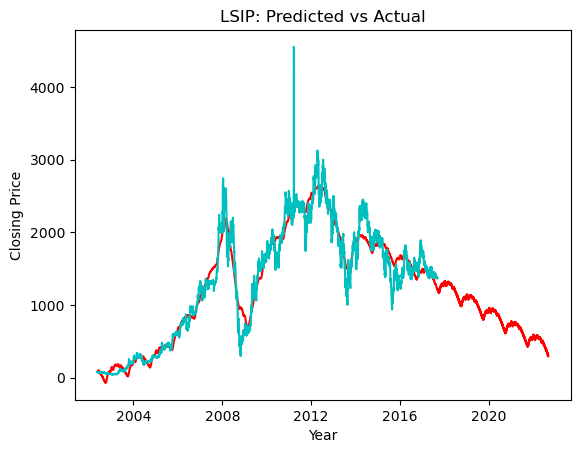

In [34]:
plt.plot(forecasth['ds'], forecasth['yhat'], 'r')
plt.plot(LSIP['ds'], LSIP['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("LSIP: Predicted vs Actual")
plt.show()

## SMRA Forecast

In [35]:
# SMRA Forecast
i = Prophet()
i.fit(SMRA)
futurei = i.make_future_dataframe(periods=1825)
forecasti = i.predict(futurei)
pd.concat([forecasti[['ds', 'yhat']].head(5), forecasti[['ds', 'yhat']].tail(5)])

08:55:33 - cmdstanpy - INFO - Chain [1] start processing
08:55:35 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2002-09-06,-15.704839
1,2002-09-09,-12.696508
2,2002-09-10,-11.125929
3,2002-09-11,-7.857229
4,2002-09-12,-5.366676
5509,2022-09-01,1187.166601
5510,2022-09-02,1185.105293
5511,2022-09-03,1182.804429
5512,2022-09-04,1182.942966
5513,2022-09-05,1184.445295


In [36]:
# SMRA Gain/Loss Forecast
SMRA_3Months = (forecasti.iloc[3778]['yhat'] - SMRA.iloc[3688]['y'])/SMRA.iloc[3688]['y']*100
SMRA_1Year = (forecasti.iloc[4053]['yhat'] - SMRA.iloc[3688]['y'])/SMRA.iloc[3688]['y']*100
SMRA_5Year = (forecasti.iloc[5513]['yhat'] - SMRA.iloc[3688]['y'])/SMRA.iloc[3688]['y']*100
print('3 Month SMRA = '+ f'{SMRA_3Months}' +'%')
print('1 Year SMRA = '+ f'{SMRA_1Year}' +'%')
print('5 Year SMRA = '+ f'{SMRA_5Year}' +'%')

3 Month SMRA = 42.91301901201807%
1 Year SMRA = 37.24427968370262%
5 Year SMRA = 20.861764817339427%


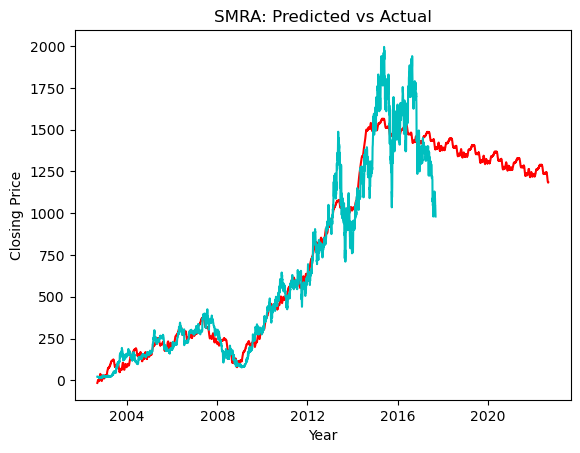

In [37]:
plt.plot(forecasti['ds'], forecasti['yhat'], 'r')
plt.plot(SMRA['ds'], SMRA['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("SMRA: Predicted vs Actual")
plt.show()

## PTBA Forecast

In [38]:
# PTBA Forecast
j = Prophet()
j.fit(PTBA)
futurej = j.make_future_dataframe(periods=1825)
forecastj = j.predict(futurej)
pd.concat([forecastj[['ds', 'yhat']].head(5), forecastj[['ds', 'yhat']].tail(5)])

08:55:38 - cmdstanpy - INFO - Chain [1] start processing
08:55:40 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2003-01-16,371.698359
1,2003-01-17,360.053810
2,2003-01-20,297.094976
3,2003-01-21,244.901074
4,2003-01-22,231.220427
5428,2022-09-01,11377.567504
5429,2022-09-02,11374.581082
5430,2022-09-03,11564.758813
5431,2022-09-04,11554.088802
5432,2022-09-05,11339.047533


In [39]:
# PTBA Gain/Loss Forecast
PTBA_3Months = (forecastj.iloc[3697]['yhat'] - PTBA.iloc[3607]['y'])/PTBA.iloc[3607]['y']*100
PTBA_1Year = (forecastj.iloc[3972]['yhat'] - PTBA.iloc[3607]['y'])/PTBA.iloc[3607]['y']*100
PTBA_5Year = (forecastj.iloc[5432]['yhat'] - PTBA.iloc[3607]['y'])/PTBA.iloc[3607]['y']*100
print('3 Month PTBA = '+ f'{PTBA_3Months}' +'%')
print('1 Year PTBA = '+ f'{PTBA_1Year}' +'%')
print('5 Year PTBA = '+ f'{PTBA_5Year}' +'%')

3 Month PTBA = -16.312491411260275%
1 Year PTBA = -15.158136842902028%
5 Year PTBA = -7.624867350134752%


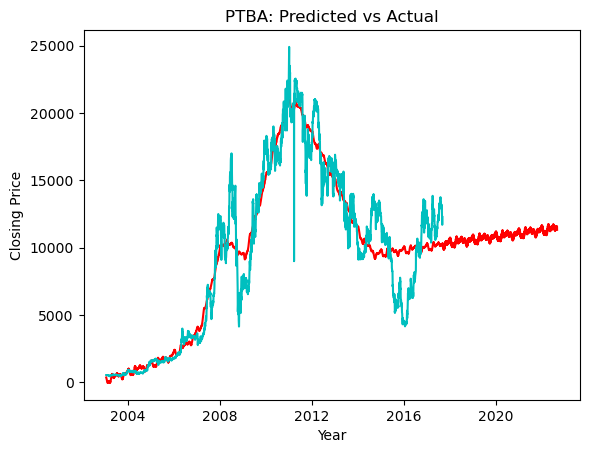

In [40]:
plt.plot(forecastj['ds'], forecastj['yhat'], 'r')
plt.plot(PTBA['ds'], PTBA['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("PTBA: Predicted vs Actual")
plt.show()

## BMRI Forecast

In [41]:
# BMRI Forecast
k = Prophet()
k.fit(BMRI)
futurek = k.make_future_dataframe(periods=1825)
forecastk = k.predict(futurek)
pd.concat([forecastk[['ds', 'yhat']].head(5), forecastk[['ds', 'yhat']].tail(5)])

08:55:43 - cmdstanpy - INFO - Chain [1] start processing
08:55:45 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2003-08-07,1196.823638
1,2003-08-08,1194.958114
2,2003-08-11,1165.481622
3,2003-08-12,1153.111532
4,2003-08-13,1158.490295
5279,2022-09-01,14685.691179
5280,2022-09-02,14683.880961
5281,2022-09-03,14538.279137
5282,2022-09-04,14536.273255
5283,2022-09-05,14669.227451


In [42]:
# BMRI Gain/Loss Forecast
BMRI_3Months = (forecastk.iloc[3548]['yhat'] - BMRI.iloc[3458]['y'])/BMRI.iloc[3458]['y']*100
BMRI_1Year = (forecastk.iloc[3823]['yhat'] - BMRI.iloc[3458]['y'])/BMRI.iloc[3458]['y']*100
BMRI_5Year = (forecastk.iloc[5283]['yhat'] - BMRI.iloc[3458]['y'])/BMRI.iloc[3458]['y']*100
print('3 Month BMRI = '+ f'{BMRI_3Months}' +'%')
print('1 Year BMRI = '+ f'{BMRI_1Year}' +'%')
print('5 Year BMRI = '+ f'{BMRI_5Year}' +'%')

3 Month BMRI = -10.769578320359646%
1 Year BMRI = -6.269800796553829%
5 Year BMRI = 13.275887651616147%


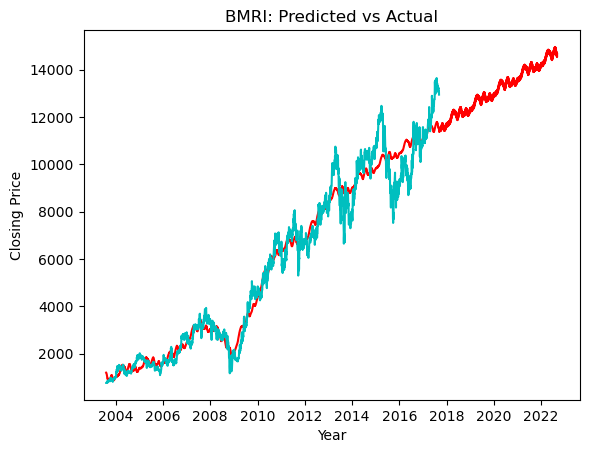

In [43]:
plt.plot(forecastk['ds'], forecastk['yhat'], 'r')
plt.plot(BMRI['ds'], BMRI['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("BMRI: Predicted vs Actual")
plt.show()

## BBNI Forecast

In [44]:
# BBNI Forecast
l = Prophet()
l.fit(BBNI)
futurel = l.make_future_dataframe(periods=1825)
forecastl = l.predict(futurel)
pd.concat([forecastl[['ds', 'yhat']].head(5), forecastl[['ds', 'yhat']].tail(5)])

08:55:47 - cmdstanpy - INFO - Chain [1] start processing
08:55:49 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2004-01-16,969.762373
1,2004-01-19,965.617068
2,2004-01-20,955.729497
3,2004-01-21,966.885995
4,2004-01-23,976.522030
5134,2022-09-01,7096.939431
5135,2022-09-02,7097.848013
5136,2022-09-03,7172.648859
5137,2022-09-04,7171.280697
5138,2022-09-05,7089.853368


In [45]:
# BBNI Gain/Loss Forecast
BBNI_3Months = (forecastl.iloc[3403]['yhat'] - BBNI.iloc[3313]['y'])/BBNI.iloc[3313]['y']*100
BBNI_1Year = (forecastl.iloc[3678]['yhat'] - BBNI.iloc[3313]['y'])/BBNI.iloc[3313]['y']*100
BBNI_5Year = (forecastl.iloc[5138]['yhat'] - BBNI.iloc[3313]['y'])/BBNI.iloc[3313]['y']*100
print('3 Month BBNI = '+ f'{BBNI_3Months}' +'%')
print('1 Year BBNI = '+ f'{BBNI_1Year}' +'%')
print('5 Year BBNI = '+ f'{BBNI_5Year}' +'%')

3 Month BBNI = -16.876436094561846%
1 Year BBNI = -13.481129640492554%
5 Year BBNI = -1.5298143391898975%


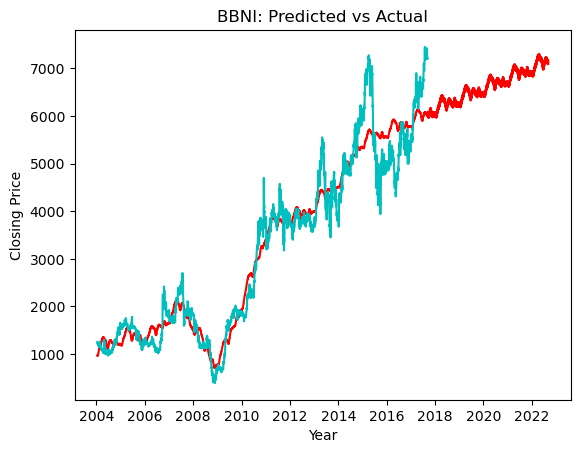

In [46]:
plt.plot(forecastl['ds'], forecastl['yhat'], 'r')
plt.plot(BBNI['ds'], BBNI['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("BBNI: Predicted vs Actual")
plt.show()

## ADHI Forecast

In [47]:
# ADHI Forecast
m = Prophet()
m.fit(ADHI)
futurem = m.make_future_dataframe(periods=1825)
forecastm = m.predict(futurem)
pd.concat([forecastm[['ds', 'yhat']].head(5), forecastm[['ds', 'yhat']].tail(5)])

08:55:51 - cmdstanpy - INFO - Chain [1] start processing
08:55:54 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2004-04-13,395.132856
1,2004-04-14,395.901152
2,2004-04-15,393.678891
3,2004-04-16,398.470337
4,2004-04-19,397.218543
5123,2022-09-01,1268.827393
5124,2022-09-02,1269.347176
5125,2022-09-03,1264.625695
5126,2022-09-04,1262.477989
5127,2022-09-05,1257.487744


In [48]:
# ADHI Gain/Loss Forecast
ADHI_3Months = (forecastm.iloc[3392]['yhat'] - ADHI.iloc[3302]['y'])/ADHI.iloc[3302]['y']*100
ADHI_1Year = (forecastm.iloc[3667]['yhat'] - ADHI.iloc[3302]['y'])/ADHI.iloc[3302]['y']*100
ADHI_5Year = (forecastm.iloc[5127]['yhat'] - ADHI.iloc[3302]['y'])/ADHI.iloc[3302]['y']*100
print('3 Month ADHI = '+ f'{ADHI_3Months}' +'%')
print('1 Year ADHI = '+ f'{ADHI_1Year}' +'%')
print('5 Year ADHI = '+ f'{ADHI_5Year}' +'%')

3 Month ADHI = 3.6829052105991993%
1 Year ADHI = -4.398298938569301%
5 Year ADHI = -35.84246205683274%


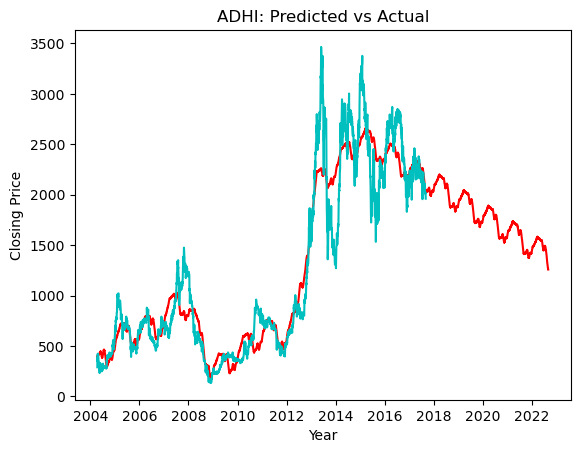

In [49]:
plt.plot(forecastm['ds'], forecastm['yhat'], 'r')
plt.plot(ADHI['ds'], ADHI['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("ADHI: Predicted vs Actual")
plt.show()

## BBCA Forecast

In [50]:
# BBCA Forecast
n = Prophet()
n.fit(BBCA)
futuren = n.make_future_dataframe(periods=1825)
forecastn = n.predict(futuren)
pd.concat([forecastn[['ds', 'yhat']].head(5), forecastn[['ds', 'yhat']].tail(5)])

08:55:56 - cmdstanpy - INFO - Chain [1] start processing
08:55:58 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2004-07-02,958.861518
1,2004-07-05,988.163425
2,2004-07-06,993.949904
3,2004-07-07,1023.027421
4,2004-07-08,1030.420431
5059,2022-09-01,25411.856548
5060,2022-09-02,25405.044310
5061,2022-09-03,25315.472814
5062,2022-09-04,25315.253329
5063,2022-09-05,25398.529164


In [51]:
# BBCA Gain/Loss Forecast
BBCA_3Months = (forecastn.iloc[3328]['yhat'] - BBCA.iloc[3238]['y'])/BBCA.iloc[3238]['y']*100
BBCA_1Year = (forecastn.iloc[3603]['yhat'] - BBCA.iloc[3238]['y'])/BBCA.iloc[3238]['y']*100
BBCA_5Year = (forecastn.iloc[5063]['yhat'] - BBCA.iloc[3238]['y'])/BBCA.iloc[3238]['y']*100
print('3 Month BBCA = '+ f'{BBCA_3Months}' +'%')
print('1 Year BBCA = '+ f'{BBCA_1Year}' +'%')
print('5 Year BBCA = '+ f'{BBCA_5Year}' +'%')

3 Month BBCA = -8.407860457728301%
1 Year BBCA = -1.7168204199512185%
5 Year BBCA = 34.38375218801445%


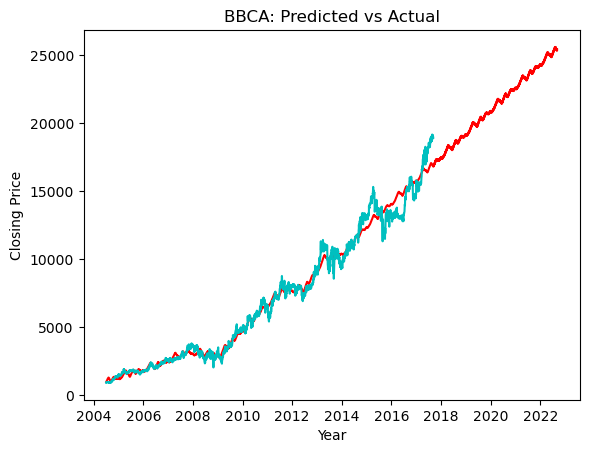

In [52]:
plt.plot(forecastn['ds'], forecastn['yhat'], 'r')
plt.plot(BBCA['ds'], BBCA['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("BBCA: Predicted vs Actual")
plt.show()

## TLKM Forecast

In [53]:
# TLKM Forecast
o = Prophet()
o.fit(TLKM)
futureo = o.make_future_dataframe(periods=1825)
forecasto = o.predict(futureo)
pd.concat([forecasto[['ds', 'yhat']].head(5), forecasto[['ds', 'yhat']].tail(5)])

08:56:00 - cmdstanpy - INFO - Chain [1] start processing
08:56:03 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2004-10-22,969.700466
1,2004-10-25,956.023408
2,2004-10-26,950.658906
3,2004-10-27,949.897778
4,2004-10-28,946.268275
4950,2022-09-01,8357.202132
4951,2022-09-02,8357.451999
4952,2022-09-03,8314.723621
4953,2022-09-04,8315.520931
4954,2022-09-05,8357.705010


In [54]:
# TLKM Gain/Loss Forecast
TLKM_3Months = (forecasto.iloc[3219]['yhat'] - TLKM.iloc[3129]['y'])/TLKM.iloc[3129]['y']*100
TLKM_1Year = (forecasto.iloc[3494]['yhat'] - TLKM.iloc[3129]['y'])/TLKM.iloc[3129]['y']*100
TLKM_5Year = (forecasto.iloc[4954]['yhat'] - TLKM.iloc[3129]['y'])/TLKM.iloc[3129]['y']*100
print('3 Month TLKM = '+ f'{TLKM_3Months}' +'%')
print('1 Year TLKM = '+ f'{TLKM_1Year}' +'%')
print('5 Year TLKM = '+ f'{TLKM_5Year}' +'%')

3 Month TLKM = 0.9874709887778955%
1 Year TLKM = 13.920886020673423%
5 Year TLKM = 77.44596624688286%


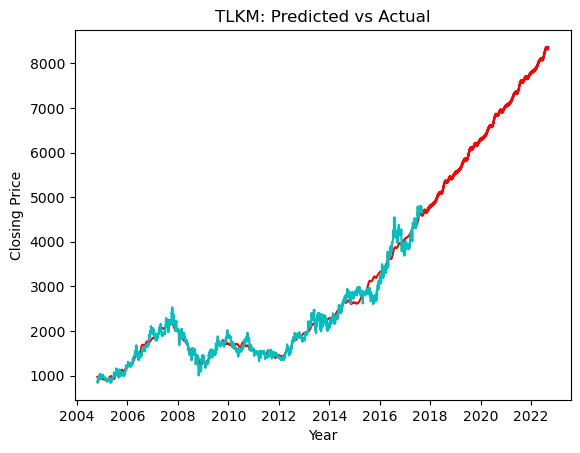

In [55]:
plt.plot(forecasto['ds'], forecasto['yhat'], 'r')
plt.plot(TLKM['ds'], TLKM['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("TLKM: Predicted vs Actual")
plt.show()

## ANTM Forecast

In [56]:
# ANTM Forecast
p = Prophet()
p.fit(ANTM)
futurep = p.make_future_dataframe(periods=1825)
forecastp = p.predict(futurep)
pd.concat([forecastp[['ds', 'yhat']].head(5), forecastp[['ds', 'yhat']].tail(5)])

08:56:05 - cmdstanpy - INFO - Chain [1] start processing
08:56:07 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2005-10-26,389.605645
1,2005-10-27,398.511697
2,2005-10-28,400.066373
3,2005-10-31,404.664758
4,2005-11-01,405.364704
4688,2022-09-01,1116.757593
4689,2022-09-02,1113.728056
4690,2022-09-03,1146.034283
4691,2022-09-04,1145.371634
4692,2022-09-05,1105.493567


In [57]:
# ANTM Gain/Loss Forecast
ANTM_3Months = (forecastp.iloc[2957]['yhat'] - ANTM.iloc[2867]['y'])/ANTM.iloc[2867]['y']*100
ANTM_1Year = (forecastp.iloc[3232]['yhat'] - ANTM.iloc[2867]['y'])/ANTM.iloc[2867]['y']*100
ANTM_5Year = (forecastp.iloc[4692]['yhat'] - ANTM.iloc[2867]['y'])/ANTM.iloc[2867]['y']*100
print('3 Month ANTM = '+ f'{ANTM_3Months}' +'%')
print('1 Year ANTM = '+ f'{ANTM_1Year}' +'%')
print('5 Year ANTM = '+ f'{ANTM_5Year}' +'%')

3 Month ANTM = 22.13892818093795%
1 Year ANTM = 7.265833864031161%
5 Year ANTM = 56.80759820322179%


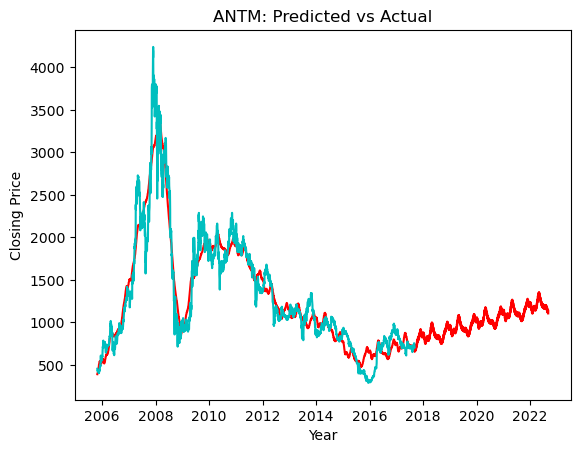

In [58]:
plt.plot(forecastp['ds'], forecastp['yhat'], 'r')
plt.plot(ANTM['ds'], ANTM['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("ANTM: Predicted vs Actual")
plt.show()

## SMGR Forecast

In [59]:
# SMGR Forecast
q = Prophet()
q.fit(SMGR)
futureq = q.make_future_dataframe(periods=1825)
forecastq = q.predict(futureq)
pd.concat([forecastq[['ds', 'yhat']].head(5), forecastq[['ds', 'yhat']].tail(5)])

08:56:10 - cmdstanpy - INFO - Chain [1] start processing
08:56:11 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2005-10-26,1424.078304
1,2005-10-27,1426.477302
2,2005-10-28,1434.148681
3,2005-10-31,1417.317460
4,2005-11-01,1399.894004
4679,2022-09-01,1933.219998
4680,2022-09-02,1933.523769
4681,2022-09-03,2121.702540
4682,2022-09-04,2123.186496
4683,2022-09-05,1922.908664


In [60]:
# SMGR Gain/Loss Forecast
SMGR_3Months = (forecastq.iloc[2948]['yhat'] - SMGR.iloc[2858]['y'])/SMGR.iloc[2858]['y']*100
SMGR_1Year = (forecastq.iloc[3223]['yhat'] - SMGR.iloc[2858]['y'])/SMGR.iloc[2858]['y']*100
SMGR_5Year = (forecastq.iloc[4683]['yhat'] - SMGR.iloc[2858]['y'])/SMGR.iloc[2858]['y']*100
print('3 Month SMGR = '+ f'{SMGR_3Months}' +'%')
print('1 Year SMGR = '+ f'{SMGR_1Year}' +'%')
print('5 Year SMGR = '+ f'{SMGR_5Year}' +'%')

3 Month SMGR = -14.074834153045268%
1 Year SMGR = -27.393881660689136%
5 Year SMGR = -80.17619933757872%


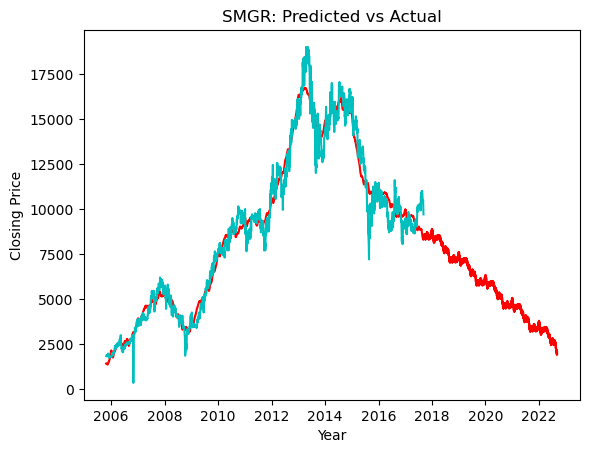

In [61]:
plt.plot(forecastq['ds'], forecastq['yhat'], 'r')
plt.plot(SMGR['ds'], SMGR['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("SMGR: Predicted vs Actual")
plt.show()

## CPIN Forecast

In [62]:
# CPIN Forecast
r = Prophet()
r.fit(CPIN)
futurer = r.make_future_dataframe(periods=1825)
forecastr = r.predict(futurer)
pd.concat([forecastr[['ds', 'yhat']].head(5), forecastr[['ds', 'yhat']].tail(5)])

08:56:14 - cmdstanpy - INFO - Chain [1] start processing
08:56:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2005-10-26,44.281924
1,2005-10-27,48.588716
2,2005-10-28,42.226694
3,2005-10-31,32.783225
4,2005-11-01,34.817870
4673,2022-09-01,3485.397392
4674,2022-09-02,3483.526692
4675,2022-09-03,3503.837223
4676,2022-09-04,3510.231181
4677,2022-09-05,3497.901534


In [63]:
# CPIN Gain/Loss Forecast
CPIN_3Months = (forecastr.iloc[2942]['yhat'] - CPIN.iloc[2852]['y'])/CPIN.iloc[2852]['y']*100
CPIN_1Year = (forecastr.iloc[3217]['yhat'] - CPIN.iloc[2852]['y'])/CPIN.iloc[2852]['y']*100
CPIN_5Year = (forecastr.iloc[4677]['yhat'] - CPIN.iloc[2852]['y'])/CPIN.iloc[2852]['y']*100
print('3 Month CPIN = '+ f'{CPIN_3Months}' +'%')
print('1 Year CPIN = '+ f'{CPIN_1Year}' +'%')
print('5 Year CPIN = '+ f'{CPIN_5Year}' +'%')

3 Month CPIN = 23.033004980760616%
1 Year CPIN = 19.67114288139597%
5 Year CPIN = 31.007548071190527%


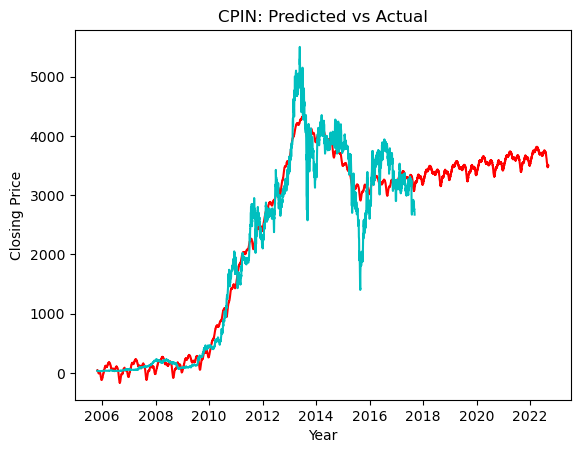

In [64]:
plt.plot(forecastr['ds'], forecastr['yhat'], 'r')
plt.plot(CPIN['ds'], CPIN['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("CPIN: Predicted vs Actual")
plt.show()

## LPKR Forecast

In [65]:
# LPKR Forecast
s = Prophet()
s.fit(LPKR)
futures = s.make_future_dataframe(periods=1825)
forecasts = s.predict(futures)
pd.concat([forecasts[['ds', 'yhat']].head(5), forecasts[['ds', 'yhat']].tail(5)])

08:56:20 - cmdstanpy - INFO - Chain [1] start processing
08:56:23 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2005-10-26,355.368272
1,2005-10-27,354.466053
2,2005-10-28,354.269532
3,2005-10-31,347.488017
4,2005-11-01,345.428512
4660,2022-09-01,-504.579876
4661,2022-09-02,-504.988503
4662,2022-09-03,-540.369616
4663,2022-09-04,-540.779286
4664,2022-09-05,-508.161831


In [66]:
# LPKR Gain/Loss Forecast
LPKR_3Months = (forecasts.iloc[2929]['yhat'] - LPKR.iloc[2839]['y'])/LPKR.iloc[2839]['y']*100
LPKR_1Year = (forecasts.iloc[3204]['yhat'] - LPKR.iloc[2839]['y'])/LPKR.iloc[2839]['y']*100
LPKR_5Year = (1 - LPKR.iloc[2839]['y'])/LPKR.iloc[2839]['y']*100
print('3 Month LPKR = '+ f'{LPKR_3Months}' +'%')
print('1 Year LPKR = '+ f'{LPKR_1Year}' +'%')
print('5 Year LPKR = '+ f'{LPKR_5Year}' +'%')

3 Month LPKR = -13.793867342214128%
1 Year LPKR = -37.81714868100601%
5 Year LPKR = -99.86111111111111%


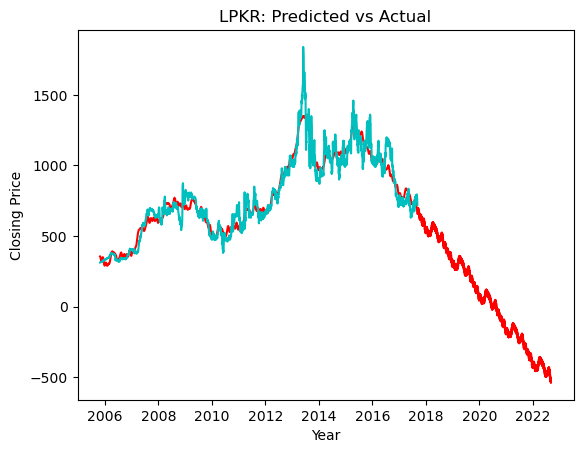

In [67]:
plt.plot(forecasts['ds'], forecasts['yhat'], 'r')
plt.plot(LPKR['ds'], LPKR['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("LPKR: Predicted vs Actual")
plt.show()

## INCO Forecast

In [68]:
# INCO Forecast
t = Prophet()
t.fit(INCO)
futuret = t.make_future_dataframe(periods=1825)
forecastt = t.predict(futuret)
pd.concat([forecastt[['ds', 'yhat']].head(5), forecastt[['ds', 'yhat']].tail(5)])

08:56:25 - cmdstanpy - INFO - Chain [1] start processing
08:56:27 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2005-10-26,898.846938
1,2005-10-27,927.221315
2,2005-10-28,946.656497
3,2005-10-31,999.398695
4,2005-11-01,1005.100134
4658,2022-09-01,1465.168818
4659,2022-09-02,1461.313522
4660,2022-09-03,1737.044452
4661,2022-09-04,1732.686030
4662,2022-09-05,1443.326233


In [69]:
# INCO Gain/Loss Forecast
INCO_3Months = (forecastt.iloc[2927]['yhat'] - INCO.iloc[2837]['y'])/INCO.iloc[2837]['y']*100
INCO_1Year = (forecastt.iloc[3202]['yhat'] - INCO.iloc[2837]['y'])/INCO.iloc[2837]['y']*100
INCO_5Year = (forecastt.iloc[4662]['yhat'] - INCO.iloc[2837]['y'])/INCO.iloc[2837]['y']*100
print('3 Month INCO = '+ f'{INCO_3Months}' +'%')
print('1 Year INCO = '+ f'{INCO_1Year}' +'%')
print('5 Year INCO = '+ f'{INCO_5Year}' +'%')

3 Month INCO = -28.145248329341648%
1 Year INCO = -36.47487359853942%
5 Year INCO = -51.72821964833712%


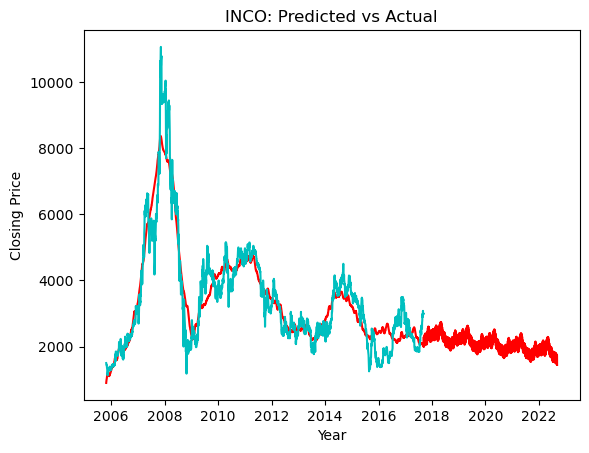

In [70]:
plt.plot(forecastt['ds'], forecastt['yhat'], 'r')
plt.plot(INCO['ds'], INCO['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("INCO: Predicted vs Actual")
plt.show()

## AKRA Forecast

In [71]:
# AKRA Forecast
u = Prophet()
u.fit(AKRA)
futureu = u.make_future_dataframe(periods=1825)
forecastu = u.predict(futureu)
pd.concat([forecastu[['ds', 'yhat']].head(5), forecastu[['ds', 'yhat']].tail(5)])

08:56:29 - cmdstanpy - INFO - Chain [1] start processing
08:56:31 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2005-10-26,352.427440
1,2005-10-27,346.994968
2,2005-10-28,344.488009
3,2005-10-31,351.744939
4,2005-11-01,348.723957
4555,2022-09-01,10340.186413
4556,2022-09-02,10341.981828
4557,2022-09-03,10414.480831
4558,2022-09-04,10421.051726
4559,2022-09-05,10371.481806


In [72]:
# AKRA Gain/Loss Forecast
AKRA_3Months = (forecastu.iloc[2824]['yhat'] - AKRA.iloc[2734]['y'])/AKRA.iloc[2734]['y']*100
AKRA_1Year = (forecastu.iloc[3099]['yhat'] - AKRA.iloc[2734]['y'])/AKRA.iloc[2734]['y']*100
AKRA_5Year = (forecastu.iloc[4559]['yhat'] - AKRA.iloc[2734]['y'])/AKRA.iloc[2734]['y']*100
print('3 Month AKRA = '+ f'{AKRA_3Months}' +'%')
print('1 Year AKRA = '+ f'{AKRA_1Year}' +'%')
print('5 Year AKRA = '+ f'{AKRA_5Year}' +'%')

3 Month AKRA = 0.8836623372288697%
1 Year AKRA = 7.550252142984211%
5 Year AKRA = 46.07720854221855%


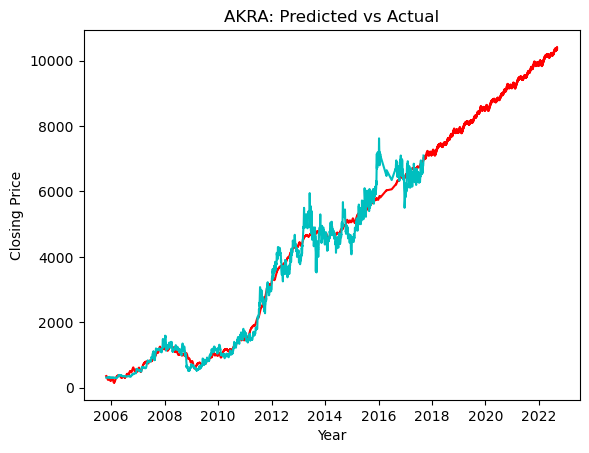

In [73]:
plt.plot(forecastu['ds'], forecastu['yhat'], 'r')
plt.plot(AKRA['ds'], AKRA['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("AKRA: Predicted vs Actual")
plt.show()

## MNCN Forecast

In [74]:
# MNCN Forecast
v = Prophet()
v.fit(MNCN)
futurev = v.make_future_dataframe(periods=1825)
forecastv = v.predict(futurev)
pd.concat([forecastv[['ds', 'yhat']].head(5), forecastv[['ds', 'yhat']].tail(5)])

08:56:33 - cmdstanpy - INFO - Chain [1] start processing
08:56:35 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2007-07-18,1052.057145
1,2007-07-19,1056.170273
2,2007-07-20,1059.134628
3,2007-07-23,1062.522207
4,2007-07-24,1067.657249
4284,2022-09-01,1413.754607
4285,2022-09-02,1417.912236
4286,2022-09-03,1374.891900
4287,2022-09-04,1380.307473
4288,2022-09-05,1429.969138


In [75]:
# MNCN Gain/Loss Forecast
MNCN_3Months = (forecastv.iloc[2553]['yhat'] - MNCN.iloc[2463]['y'])/MNCN.iloc[2463]['y']*100
MNCN_1Year = (forecastv.iloc[2828]['yhat'] - MNCN.iloc[2463]['y'])/MNCN.iloc[2463]['y']*100
MNCN_5Year = (forecastv.iloc[4288]['yhat'] - MNCN.iloc[2463]['y'])/MNCN.iloc[2463]['y']*100
print('3 Month MNCN = '+ f'{MNCN_3Months}' +'%')
print('1 Year MNCN = '+ f'{MNCN_1Year}' +'%')
print('5 Year MNCN = '+ f'{MNCN_5Year}' +'%')

3 Month MNCN = 23.043957033819986%
1 Year MNCN = 21.353260555734295%
5 Year MNCN = 3.620952042092112%


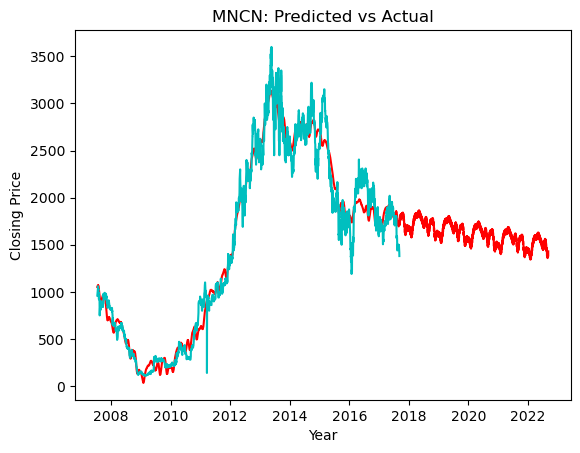

In [76]:
plt.plot(forecastv['ds'], forecastv['yhat'], 'r')
plt.plot(MNCN['ds'], MNCN['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("MNCN: Predicted vs Actual")
plt.show()

## WIKA Forecast

In [77]:
# WIKA Forecast
w = Prophet()
w.fit(WIKA)
futurew = w.make_future_dataframe(periods=1825)
forecastw = w.predict(futurew)
pd.concat([forecastw[['ds', 'yhat']].head(5), forecastw[['ds', 'yhat']].tail(5)])

08:56:37 - cmdstanpy - INFO - Chain [1] start processing
08:56:39 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2007-11-22,419.671631
1,2007-11-23,423.509353
2,2007-11-26,415.698153
3,2007-11-27,425.270822
4,2007-11-28,428.765278
4199,2022-09-01,1207.368982
4200,2022-09-02,1207.821957
4201,2022-09-03,1212.034894
4202,2022-09-04,1210.536804
4203,2022-09-05,1189.344569


In [78]:
# WIKA Gain/Loss Forecast
WIKA_3Months = (forecastw.iloc[2468]['yhat'] - WIKA.iloc[2378]['y'])/WIKA.iloc[2378]['y']*100
WIKA_1Year = (forecastw.iloc[2743]['yhat'] - WIKA.iloc[2378]['y'])/WIKA.iloc[2378]['y']*100
WIKA_5Year = (forecastw.iloc[4203]['yhat'] - WIKA.iloc[2378]['y'])/WIKA.iloc[2378]['y']*100
print('3 Month WIKA = '+ f'{WIKA_3Months}' +'%')
print('1 Year WIKA = '+ f'{WIKA_1Year}' +'%')
print('5 Year WIKA = '+ f'{WIKA_5Year}' +'%')

3 Month WIKA = 14.175099092164364%
1 Year WIKA = 6.984300362645744%
5 Year WIKA = -37.237753604111425%


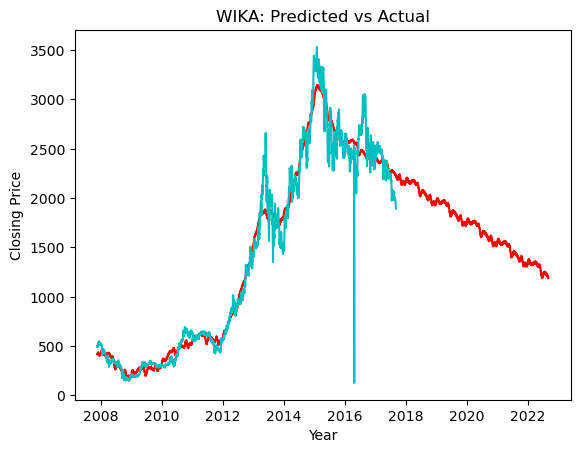

In [79]:
plt.plot(forecastw['ds'], forecastw['yhat'], 'r')
plt.plot(WIKA['ds'], WIKA['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("WIKA: Predicted vs Actual")
plt.show()

## JSMR Forecast

In [80]:
# JSMR Forecast
x = Prophet()
x.fit(JSMR)
futurex = x.make_future_dataframe(periods=1825)
forecastx = x.predict(futurex)
pd.concat([forecastx[['ds', 'yhat']].head(5), forecastx[['ds', 'yhat']].tail(5)])

08:56:41 - cmdstanpy - INFO - Chain [1] start processing
08:56:43 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2007-12-06,1828.376782
1,2007-12-07,1822.455691
2,2007-12-10,1797.190568
3,2007-12-11,1797.914099
4,2007-12-12,1796.626474
4188,2022-09-01,3762.760113
4189,2022-09-02,3751.662571
4190,2022-09-03,3749.928329
4191,2022-09-04,3740.720138
4192,2022-09-05,3715.539188


In [81]:
# JSMR Gain/Loss Forecast
JSMR_3Months = (forecastx.iloc[2457]['yhat'] - JSMR.iloc[2367]['y'])/JSMR.iloc[2367]['y']*100
JSMR_1Year = (forecastx.iloc[2732]['yhat'] - JSMR.iloc[2367]['y'])/JSMR.iloc[2367]['y']*100
JSMR_5Year = (forecastx.iloc[4192]['yhat'] - JSMR.iloc[2367]['y'])/JSMR.iloc[2367]['y']*100
print('3 Month JSMR = '+ f'{JSMR_3Months}' +'%')
print('1 Year JSMR = '+ f'{JSMR_1Year}' +'%')
print('5 Year JSMR = '+ f'{JSMR_5Year}' +'%')

3 Month JSMR = -22.3437958381522%
1 Year JSMR = -21.765812706625137%
5 Year JSMR = -37.02475952849767%


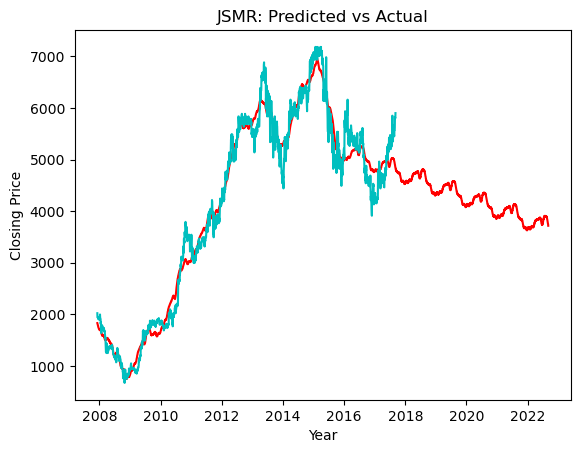

In [82]:
plt.plot(forecastx['ds'], forecastx['yhat'], 'r')
plt.plot(JSMR['ds'], JSMR['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("JSMR: Predicted vs Actual")
plt.show()

## ASRI Forecast

In [83]:
# ASRI Forecast
y = Prophet()
y.fit(ASRI)
futurey = y.make_future_dataframe(periods=1825)
forecasty = y.predict(futurey)
pd.concat([forecasty[['ds', 'yhat']].head(5), forecasty[['ds', 'yhat']].tail(5)])

08:56:45 - cmdstanpy - INFO - Chain [1] start processing
08:56:47 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2008-01-22,141.781841
1,2008-01-23,143.146929
2,2008-01-24,143.030757
3,2008-01-25,142.694032
4,2008-01-28,143.520324
4161,2022-09-01,120.838539
4162,2022-09-02,118.865394
4163,2022-09-03,142.339042
4164,2022-09-04,141.504231
4165,2022-09-05,115.810781


In [84]:
# ASRI Gain/Loss Forecast
ASRI_3Months = (forecasty.iloc[2430]['yhat'] - ASRI.iloc[2340]['y'])/ASRI.iloc[2340]['y']*100
ASRI_1Year = (forecasty.iloc[2705]['yhat'] - ASRI.iloc[2340]['y'])/ASRI.iloc[2340]['y']*100
ASRI_5Year = (forecasty.iloc[4165]['yhat'] - ASRI.iloc[2340]['y'])/ASRI.iloc[2340]['y']*100
print('3 Month ASRI = '+ f'{ASRI_3Months}' +'%')
print('1 Year ASRI = '+ f'{ASRI_1Year}' +'%')
print('5 Year ASRI = '+ f'{ASRI_5Year}' +'%')

3 Month ASRI = -4.948215799885898%
1 Year ASRI = -16.536364981131655%
5 Year ASRI = -65.1172345993833%


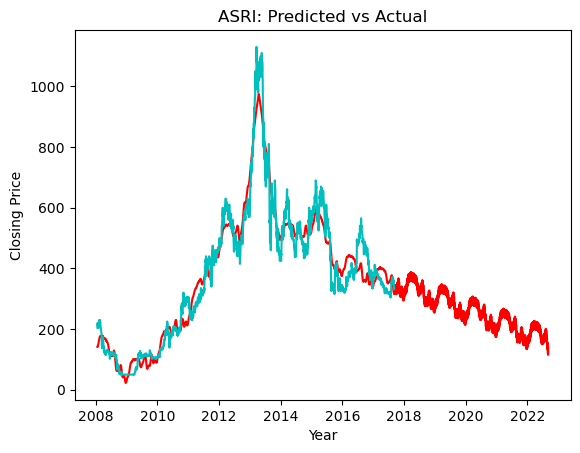

In [85]:
plt.plot(forecasty['ds'], forecasty['yhat'], 'r')
plt.plot(ASRI['ds'], ASRI['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("ASRI: Predicted vs Actual")
plt.show()

## ELSA Forecast

In [86]:
# ELSA Forecast
z = Prophet()
z.fit(ELSA)
futurez = z.make_future_dataframe(periods=1825)
forecastz = z.predict(futurez)
pd.concat([forecastz[['ds', 'yhat']].head(5), forecastz[['ds', 'yhat']].tail(5)])

08:56:49 - cmdstanpy - INFO - Chain [1] start processing
08:56:50 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2008-03-05,310.692529
1,2008-03-06,313.299203
2,2008-03-10,312.636252
3,2008-03-11,312.238487
4,2008-03-12,312.921445
4134,2022-09-01,245.506582
4135,2022-09-02,245.699062
4136,2022-09-03,294.590393
4137,2022-09-04,295.495705
4138,2022-09-05,247.009090


In [87]:
# ELSA Gain/Loss Forecast
ELSA_3Months = (forecastz.iloc[2403]['yhat'] - ELSA.iloc[2313]['y'])/ELSA.iloc[2313]['y']*100
ELSA_1Year = (forecastz.iloc[2678]['yhat'] - ELSA.iloc[2313]['y'])/ELSA.iloc[2313]['y']*100
ELSA_5Year = (forecastz.iloc[4138]['yhat'] - ELSA.iloc[2313]['y'])/ELSA.iloc[2313]['y']*100
print('3 Month ELSA = '+ f'{ELSA_3Months}' +'%')
print('1 Year ELSA = '+ f'{ELSA_1Year}' +'%')
print('5 Year ELSA = '+ f'{ELSA_5Year}' +'%')

3 Month ELSA = 40.41959037673873%
1 Year ELSA = 45.87664715769773%
5 Year ELSA = 5.559440143336576%


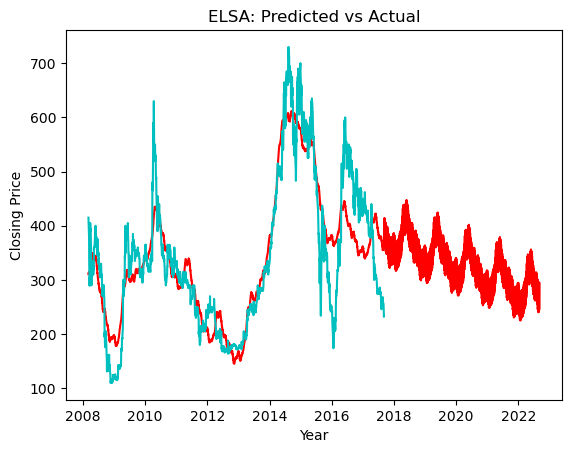

In [88]:
plt.plot(forecastz['ds'], forecastz['yhat'], 'r')
plt.plot(ELSA['ds'], ELSA['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("ELSA: Predicted vs Actual")
plt.show()

## BSDE Forecast

In [89]:
# BSDE Forecast
aa = Prophet()
aa.fit(BSDE)
futureaa = aa.make_future_dataframe(periods=1825)
forecastaa = aa.predict(futureaa)
pd.concat([forecastaa[['ds', 'yhat']].head(5), forecastaa[['ds', 'yhat']].tail(5)])

08:56:52 - cmdstanpy - INFO - Chain [1] start processing
08:56:53 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2008-07-02,285.859119
1,2008-07-03,286.283304
2,2008-07-04,285.825352
3,2008-07-07,281.968625
4,2008-07-08,284.059400
4055,2022-09-01,2022.958383
4056,2022-09-02,2019.965292
4057,2022-09-03,2077.672501
4058,2022-09-04,2075.797780
4059,2022-09-05,2010.194006


In [90]:
# BSDE Gain/Loss Forecast
BSDE_3Months = (forecastaa.iloc[2324]['yhat'] - BSDE.iloc[2234]['y'])/BSDE.iloc[2234]['y']*100
BSDE_1Year = (forecastaa.iloc[2599]['yhat'] - BSDE.iloc[2234]['y'])/BSDE.iloc[2234]['y']*100
BSDE_5Year = (forecastaa.iloc[4059]['yhat'] - BSDE.iloc[2234]['y'])/BSDE.iloc[2234]['y']*100
print('3 Month BSDE = '+ f'{BSDE_3Months}' +'%')
print('1 Year BSDE = '+ f'{BSDE_1Year}' +'%')
print('5 Year BSDE = '+ f'{BSDE_5Year}' +'%')

3 Month BSDE = 1.1690517011336803%
1 Year BSDE = 2.2497393501209495%
5 Year BSDE = 10.14761679233256%


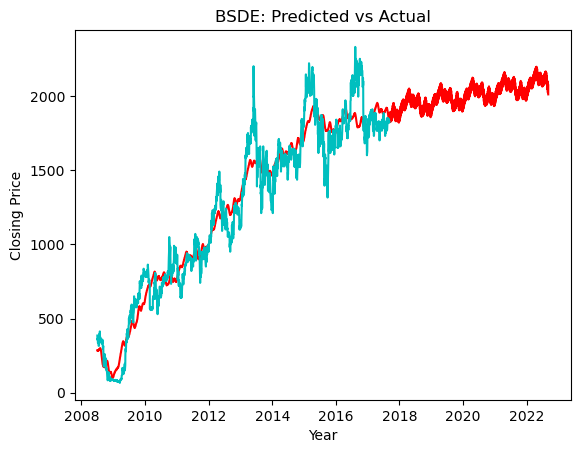

In [91]:
plt.plot(forecastaa['ds'], forecastaa['yhat'], 'r')
plt.plot(BSDE['ds'], BSDE['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("BSDE: Predicted vs Actual")
plt.show()

## MYRX Forecast

In [92]:
# MYRX Forecast
ab = Prophet()
ab.fit(MYRX)
futureab = ab.make_future_dataframe(periods=1825)
forecastab = ab.predict(futureab)
pd.concat([forecastab[['ds', 'yhat']].head(5), forecastab[['ds', 'yhat']].tail(5)])

08:56:55 - cmdstanpy - INFO - Chain [1] start processing
08:56:57 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2009-07-09,4979.057616
1,2009-07-10,4979.610751
2,2009-07-13,4989.666226
3,2009-07-14,4983.745206
4,2009-07-15,4989.580796
3876,2022-09-01,-160.055562
3877,2022-09-02,-152.578626
3878,2022-09-03,-655.881242
3879,2022-09-04,-645.657149
3880,2022-09-05,-115.978961


In [93]:
# MYRX Gain/Loss Forecast
MYRX_3Months = (forecastab.iloc[2145]['yhat'] - MYRX.iloc[2055]['y'])/MYRX.iloc[2055]['y']*100
MYRX_1Year = (1 - MYRX.iloc[2055]['y'])/MYRX.iloc[2055]['y']*100
MYRX_5Year = (1 - MYRX.iloc[2055]['y'])/MYRX.iloc[2055]['y']*100
print('3 Month MYRX = '+ f'{MYRX_3Months}' +'%')
print('1 Year MYRX = '+ f'{MYRX_1Year}' +'%')
print('5 Year MYRX = '+ f'{MYRX_5Year}' +'%')

3 Month MYRX = 72.97342874965814%
1 Year MYRX = -98.33333333333333%
5 Year MYRX = -98.33333333333333%


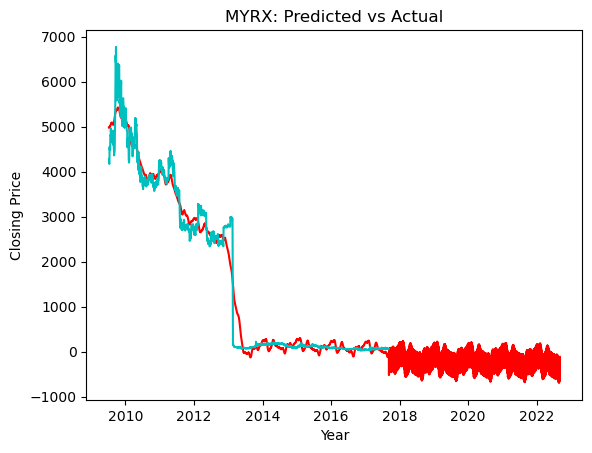

In [94]:
plt.plot(forecastab['ds'], forecastab['yhat'], 'r')
plt.plot(MYRX['ds'], MYRX['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("MYRX: Predicted vs Actual")
plt.show()

## BBTN Forecast

In [95]:
# BBTN Forecast
ac = Prophet()
ac.fit(BBTN)
futureac = ac.make_future_dataframe(periods=1825)
forecastac = ac.predict(futureac)
pd.concat([forecastac[['ds', 'yhat']].head(5), forecastac[['ds', 'yhat']].tail(5)])

08:56:59 - cmdstanpy - INFO - Chain [1] start processing
08:57:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2010-01-19,885.659436
1,2010-01-20,889.969862
2,2010-01-21,890.654895
3,2010-01-22,892.240572
4,2010-01-25,895.874951
3687,2022-09-01,6122.215840
3688,2022-09-02,6119.337913
3689,2022-09-03,6043.666990
3690,2022-09-04,6041.268712
3691,2022-09-05,6108.294593


In [96]:
# BBTN Gain/Loss Forecast
BBTN_3Months = (forecastac.iloc[1956]['yhat'] - BBTN.iloc[1866]['y'])/BBTN.iloc[1866]['y']*100
BBTN_1Year = (forecastac.iloc[2231]['yhat'] - BBTN.iloc[1866]['y'])/BBTN.iloc[1866]['y']*100
BBTN_5Year = (forecastac.iloc[3691]['yhat'] - BBTN.iloc[1866]['y'])/BBTN.iloc[1866]['y']*100
print('3 Month BBTN = '+ f'{BBTN_3Months}' +'%')
print('1 Year BBTN = '+ f'{BBTN_1Year}' +'%')
print('5 Year BBTN = '+ f'{BBTN_5Year}' +'%')

3 Month BBTN = -13.737303612697978%
1 Year BBTN = 6.812763862919698%
5 Year BBTN = 97.67943667439151%


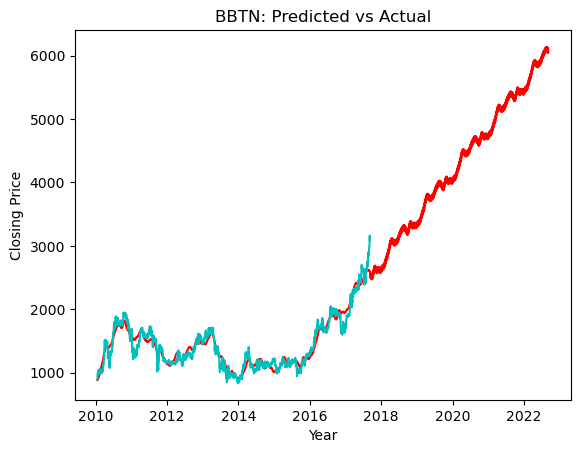

In [97]:
plt.plot(forecastac['ds'], forecastac['yhat'], 'r')
plt.plot(BBTN['ds'], BBTN['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("BBTN: Predicted vs Actual")
plt.show()

## PTPP Forecast

In [98]:
# PTPP Forecast
ad = Prophet()
ad.fit(PTPP)
futuread = ad.make_future_dataframe(periods=1825)
forecastad = ad.predict(futuread)
pd.concat([forecastad[['ds', 'yhat']].head(5), forecastad[['ds', 'yhat']].tail(5)])

08:57:02 - cmdstanpy - INFO - Chain [1] start processing
08:57:04 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2010-03-08,651.890390
1,2010-03-09,657.675206
2,2010-03-10,662.546057
3,2010-03-11,671.566392
4,2010-03-12,672.989065
3656,2022-09-01,1138.712912
3657,2022-09-02,1135.918644
3658,2022-09-03,1057.735666
3659,2022-09-04,1058.297891
3660,2022-09-05,1126.195274


In [99]:
# PTPP Gain/Loss Forecast
PTPP_3Months = (forecastad.iloc[1925]['yhat'] - PTPP.iloc[1835]['y'])/PTPP.iloc[1835]['y']*100
PTPP_1Year = (forecastad.iloc[2200]['yhat'] - PTPP.iloc[1835]['y'])/PTPP.iloc[1835]['y']*100
PTPP_5Year = (forecastad.iloc[3660]['yhat'] - PTPP.iloc[1835]['y'])/PTPP.iloc[1835]['y']*100
print('3 Month PTPP = '+ f'{PTPP_3Months}' +'%')
print('1 Year PTPP = '+ f'{PTPP_1Year}' +'%')
print('5 Year PTPP = '+ f'{PTPP_5Year}' +'%')

3 Month PTPP = 19.525549683029123%
1 Year PTPP = 4.301219442191299%
5 Year PTPP = -57.015447554010294%


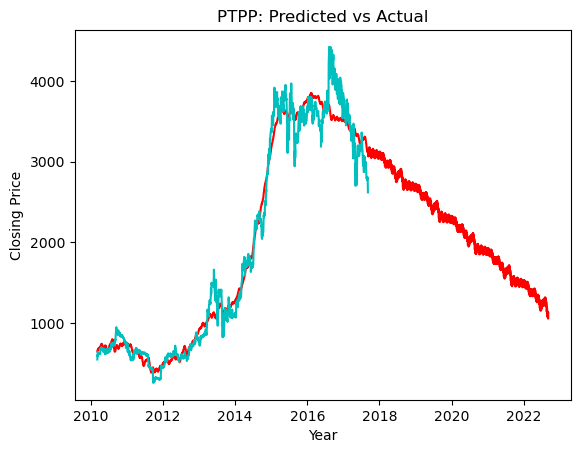

In [100]:
plt.plot(forecastad['ds'], forecastad['yhat'], 'r')
plt.plot(PTPP['ds'], PTPP['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("PTPP: Predicted vs Actual")
plt.show()

## PWON Forecast

In [101]:
# PWON Forecast
af = Prophet()
af.fit(PWON)
futureaf = af.make_future_dataframe(periods=1825)
forecastaf = af.predict(futureaf)
pd.concat([forecastaf[['ds', 'yhat']].head(5), forecastaf[['ds', 'yhat']].tail(5)])

08:57:06 - cmdstanpy - INFO - Chain [1] start processing
08:57:07 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2010-10-26,1983.265793
1,2010-10-27,2071.699029
2,2010-10-28,2109.061103
3,2010-10-29,2181.233905
4,2010-11-01,2291.190738
3547,2022-09-01,5540.054876
3548,2022-09-02,5540.732673
3549,2022-09-03,7788.199459
3550,2022-09-04,7779.301341
3551,2022-09-05,5472.047608


In [102]:
# PWON Gain/Loss Forecast
PWON_3Months = (forecastaf.iloc[1816]['yhat'] - PWON.iloc[1726]['y'])/PWON.iloc[1726]['y']*100
PWON_1Year = (forecastaf.iloc[2091]['yhat'] - PWON.iloc[1726]['y'])/PWON.iloc[1726]['y']*100
PWON_5Year = (forecastaf.iloc[3551]['yhat'] - PWON.iloc[1726]['y'])/PWON.iloc[1726]['y']*100
print('3 Month PWON = '+ f'{PWON_3Months}' +'%')
print('1 Year PWON = '+ f'{PWON_1Year}' +'%')
print('5 Year PWON = '+ f'{PWON_5Year}' +'%')

3 Month PWON = -6.717925537100595%
1 Year PWON = 48.100852327627116%
5 Year PWON = 188.00250570324204%


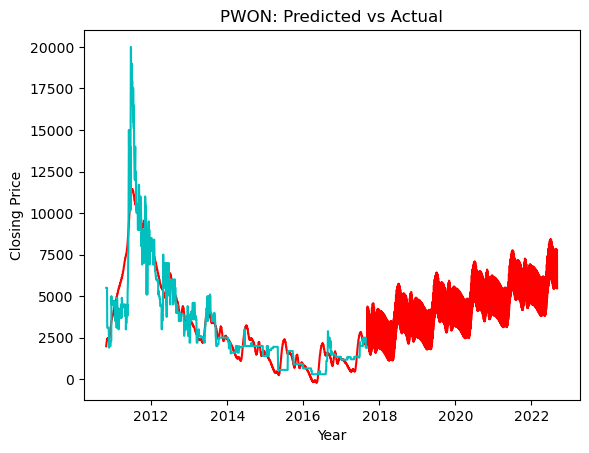

In [103]:
plt.plot(forecastaf['ds'], forecastaf['yhat'], 'r')
plt.plot(PWON['ds'], PWON['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("PWON: Predicted vs Actual")
plt.show()

## WSKT Forecast

In [104]:
# WSKT Forecast
ag = Prophet()
ag.fit(WSKT)
futureag = ag.make_future_dataframe(periods=1825)
forecastag = ag.predict(futureag)
pd.concat([forecastag[['ds', 'yhat']].head(5), forecastag[['ds', 'yhat']].tail(5)])

08:57:09 - cmdstanpy - INFO - Chain [1] start processing
08:57:10 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2013-01-18,407.770142
1,2013-01-21,414.612794
2,2013-01-22,422.024763
3,2013-01-23,433.013181
4,2013-01-25,441.114119
2951,2022-09-01,-813.354018
2952,2022-09-02,-819.103562
2953,2022-09-03,-809.275533
2954,2022-09-04,-814.661587
2955,2022-09-05,-842.684970


In [105]:
# WSKT Gain/Loss Forecast
WSKT_3Months = (forecastag.iloc[1220]['yhat'] - WSKT.iloc[1130]['y'])/WSKT.iloc[1130]['y']*100
WSKT_1Year = (forecastag.iloc[1495]['yhat'] - WSKT.iloc[1130]['y'])/WSKT.iloc[1130]['y']*100
WSKT_5Year = (1 - WSKT.iloc[1130]['y'])/WSKT.iloc[1130]['y']*100
print('3 Month WSKT = '+ f'{WSKT_3Months}' +'%')
print('1 Year WSKT = '+ f'{WSKT_1Year}' +'%')
print('5 Year WSKT = '+ f'{WSKT_5Year}' +'%')

3 Month WSKT = -10.288605940199442%
1 Year WSKT = -28.68543996417819%
5 Year WSKT = -99.95238095238095%


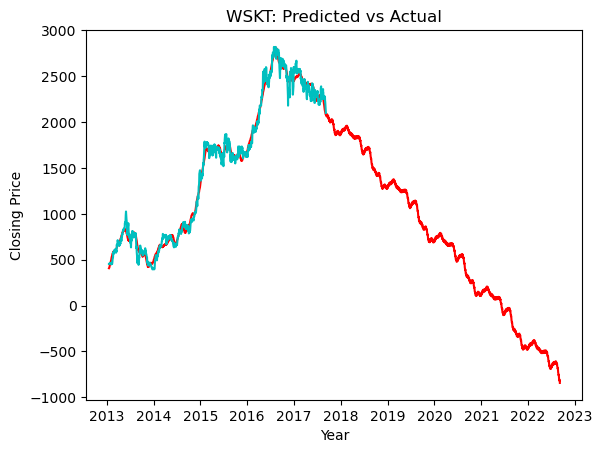

In [106]:
plt.plot(forecastag['ds'], forecastag['yhat'], 'r')
plt.plot(WSKT['ds'], WSKT['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("WSKT: Predicted vs Actual")
plt.show()

## SRIL Forecast

In [107]:
# SRIL Forecast
ah = Prophet()
ah.fit(SRIL)
futureah = ah.make_future_dataframe(periods=1825)
forecastah = ah.predict(futureah)
pd.concat([forecastah[['ds', 'yhat']].head(5), forecastah[['ds', 'yhat']].tail(5)])

08:57:12 - cmdstanpy - INFO - Chain [1] start processing
08:57:13 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2013-07-11,243.510908
1,2013-07-12,244.932803
2,2013-07-15,248.979718
3,2013-07-16,248.372060
4,2013-07-17,250.079624
2831,2022-09-01,1046.707694
2832,2022-09-02,1047.467418
2833,2022-09-03,1029.256397
2834,2022-09-04,1029.621167
2835,2022-09-05,1049.711927


In [108]:
# SRIL Gain/Loss Forecast
SRIL_3Months = (forecastah.iloc[1100]['yhat'] - SRIL.iloc[1010]['y'])/SRIL.iloc[1010]['y']*100
SRIL_1Year = (forecastah.iloc[1375]['yhat'] - SRIL.iloc[1010]['y'])/SRIL.iloc[1010]['y']*100
SRIL_5Year = (forecastah.iloc[2835]['yhat'] - SRIL.iloc[1010]['y'])/SRIL.iloc[1010]['y']*100
print('3 Month SRIL = '+ f'{SRIL_3Months}' +'%')
print('1 Year SRIL = '+ f'{SRIL_1Year}' +'%')
print('5 Year SRIL = '+ f'{SRIL_5Year}' +'%')

3 Month SRIL = 11.533788831719816%
1 Year SRIL = 37.83467696802916%
5 Year SRIL = 194.86290077357333%


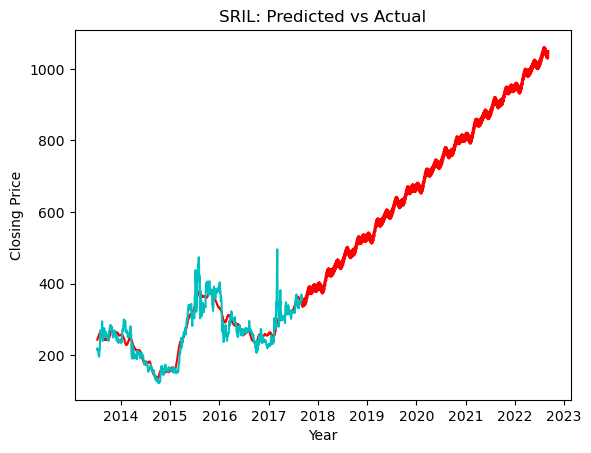

In [109]:
plt.plot(forecastah['ds'], forecastah['yhat'], 'r')
plt.plot(SRIL['ds'], SRIL['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("SRIL: Predicted vs Actual")
plt.show()

## SSMS Forecast

In [110]:
# SSMS Forecast
ai = Prophet()
ai.fit(SSMS)
futureai = ai.make_future_dataframe(periods=1825)
forecastai = ai.predict(futureai)
pd.concat([forecastai[['ds', 'yhat']].head(5), forecastai[['ds', 'yhat']].tail(5)])

08:57:14 - cmdstanpy - INFO - Chain [1] start processing
08:57:15 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2014-01-13,753.888556
1,2014-01-15,767.844155
2,2014-01-16,776.865064
3,2014-01-17,788.009236
4,2014-01-20,806.903510
2710,2022-09-01,1158.609550
2711,2022-09-02,1162.445760
2712,2022-09-03,1193.502031
2713,2022-09-04,1194.191655
2714,2022-09-05,1161.612870


In [111]:
# SSMS Gain/Loss Forecast
SSMS_3Months = (forecastai.iloc[979]['yhat'] - SSMS.iloc[889]['y'])/SSMS.iloc[889]['y']*100
SSMS_1Year = (forecastai.iloc[1254]['yhat'] - SSMS.iloc[889]['y'])/SSMS.iloc[889]['y']*100
SSMS_5Year = (forecastai.iloc[2714]['yhat'] - SSMS.iloc[889]['y'])/SSMS.iloc[889]['y']*100
print('3 Month SSMS = '+ f'{SSMS_3Months}' +'%')
print('1 Year SSMS = '+ f'{SSMS_1Year}' +'%')
print('5 Year SSMS = '+ f'{SSMS_5Year}' +'%')

3 Month SSMS = -13.268579818949453%
1 Year SSMS = -7.728184366515772%
5 Year SSMS = -23.325883173250876%


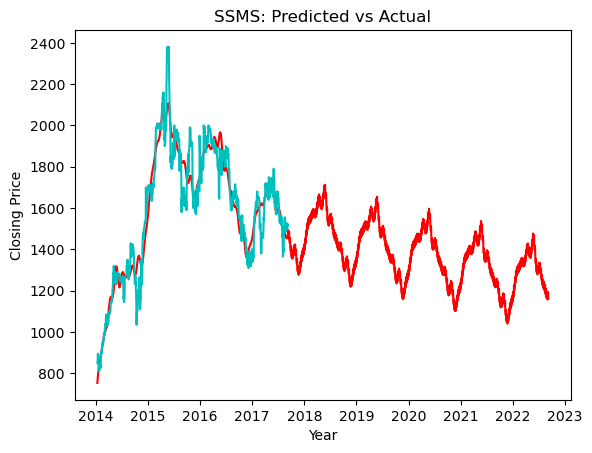

In [112]:
plt.plot(forecastai['ds'], forecastai['yhat'], 'r')
plt.plot(SSMS['ds'], SSMS['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("SSMS: Predicted vs Actual")
plt.show()

## BUMI Forecast

In [113]:
# BUMI Forecast
aj = Prophet()
aj.fit(BUMI)
futureaj = aj.make_future_dataframe(periods=1825)
forecastaj = aj.predict(futureaj)
pd.concat([forecastaj[['ds', 'yhat']].head(5), forecastaj[['ds', 'yhat']].tail(5)])

08:57:17 - cmdstanpy - INFO - Chain [1] start processing
08:57:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2005-11-01,81.810819
1,2005-11-10,248.867719
2,2005-11-11,248.482914
3,2005-11-14,265.814359
4,2005-11-15,294.356577
2645,2022-09-01,-246.621695
2646,2022-09-02,-271.430328
2647,2022-09-03,45.235377
2648,2022-09-04,39.883631
2649,2022-09-05,-322.953688


In [114]:
# BUMI Gain/Loss Forecast
BUMI_3Months = (forecastaj.iloc[914]['yhat'] - BUMI.iloc[824]['y'])/BUMI.iloc[824]['y']*100
BUMI_1Year = (forecastaj.iloc[1189]['yhat'] - BUMI.iloc[824]['y'])/BUMI.iloc[824]['y']*100
BUMI_5Year = (1 - BUMI.iloc[824]['y'])/BUMI.iloc[824]['y']*100
print('3 Month BUMI = '+ f'{BUMI_3Months}' +'%')
print('1 Year BUMI = '+ f'{BUMI_1Year}' +'%')
print('5 Year BUMI = '+ f'{BUMI_5Year}' +'%')

3 Month BUMI = -145.7609020322234%
1 Year BUMI = 60.29519979305247%
5 Year BUMI = -99.59677419354838%


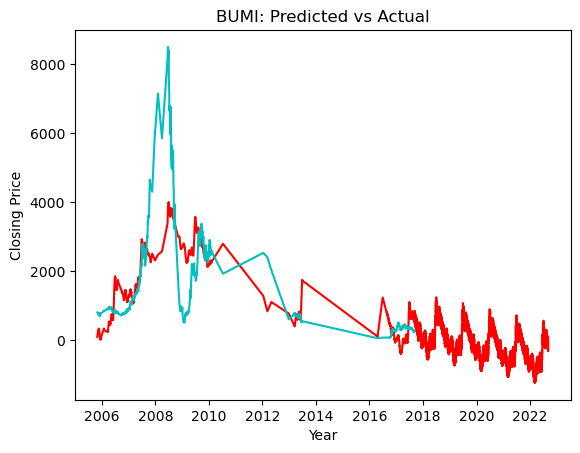

In [115]:
plt.plot(forecastaj['ds'], forecastaj['yhat'], 'r')
plt.plot(BUMI['ds'], BUMI['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("BUMI: Predicted vs Actual")
plt.show()

## PGAS Forecast

In [116]:
# PGAS Forecast
ak = Prophet()
ak.fit(PGAS)
futureak = ak.make_future_dataframe(periods=1825)
forecastak = ak.predict(futureak)
pd.concat([forecastak[['ds', 'yhat']].head(5), forecastak[['ds', 'yhat']].tail(5)])

08:57:19 - cmdstanpy - INFO - Chain [1] start processing
08:57:20 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2014-08-27,16181.890934
1,2014-08-28,16050.264416
2,2014-08-29,16009.005122
3,2014-09-02,15795.222531
4,2014-09-03,15792.513568
2583,2022-09-01,2162.902382
2584,2022-09-02,2194.061684
2585,2022-09-03,3604.979967
2586,2022-09-04,3613.941541
2587,2022-09-05,2352.444154


In [117]:
# PGAS Gain/Loss Forecast
PGAS_3Months = (forecastak.iloc[852]['yhat'] - PGAS.iloc[762]['y'])/PGAS.iloc[762]['y']*100
PGAS_1Year = (forecastak.iloc[1127]['yhat'] - PGAS.iloc[762]['y'])/PGAS.iloc[762]['y']*100
PGAS_5Year = (forecastak.iloc[2587]['yhat'] - PGAS.iloc[762]['y'])/PGAS.iloc[762]['y']*100
print('3 Month PGAS = '+ f'{PGAS_3Months}' +'%')
print('1 Year PGAS = '+ f'{PGAS_1Year}' +'%')
print('5 Year PGAS = '+ f'{PGAS_5Year}' +'%')

3 Month PGAS = 17.004324823269297%
1 Year PGAS = 13.270605926483823%
5 Year PGAS = -28.713813524260058%


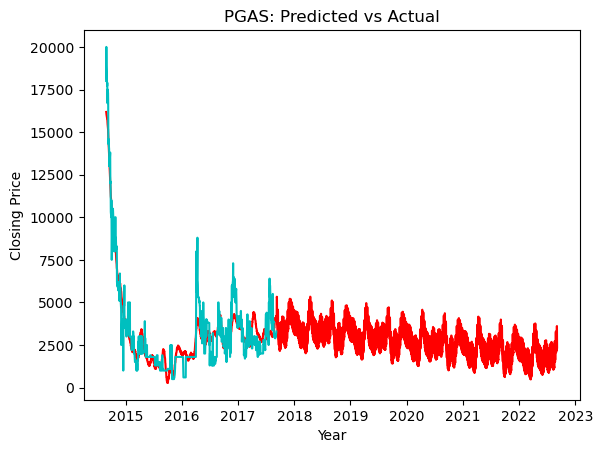

In [118]:
plt.plot(forecastak['ds'], forecastak['yhat'], 'r')
plt.plot(PGAS['ds'], PGAS['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("PGAS: Predicted vs Actual")
plt.show()

## PPRO Forecast

In [119]:
# PPRO Forecast
al = Prophet()
al.fit(PPRO)
futureal = al.make_future_dataframe(periods=1825)
forecastal = al.predict(futureal)
pd.concat([forecastal[['ds', 'yhat']].head(5), forecastal[['ds', 'yhat']].tail(5)])

08:57:21 - cmdstanpy - INFO - Chain [1] start processing
08:57:22 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2015-06-15,50.262856
1,2015-06-16,49.471422
2,2015-06-17,50.540718
3,2015-06-18,50.049968
4,2015-06-19,50.021052
2364,2022-09-01,-581.804797
2365,2022-09-02,-581.787227
2366,2022-09-03,-609.886868
2367,2022-09-04,-609.648854
2368,2022-09-05,-581.609761


In [120]:
# PPRO Gain/Loss Forecast
PPRO_3Months = (forecastal.iloc[633]['yhat'] - PPRO.iloc[543]['y'])/PPRO.iloc[543]['y']*100
PPRO_1Year = (forecastal.iloc[908]['yhat'] - PPRO.iloc[543]['y'])/PPRO.iloc[543]['y']*100
PPRO_5Year = (1 - PPRO.iloc[543]['y'])/PPRO.iloc[543]['y']*100
print('3 Month PPRO = '+ f'{PPRO_3Months}' +'%')
print('1 Year PPRO = '+ f'{PPRO_1Year}' +'%')
print('5 Year PPRO = '+ f'{PPRO_5Year}' +'%')

3 Month PPRO = -1.4812370496681153%
1 Year PPRO = -76.802410448447%
5 Year PPRO = -99.54128440366972%


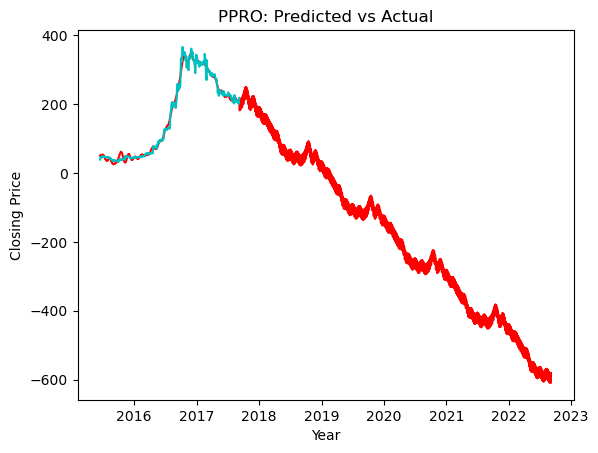

In [121]:
plt.plot(forecastal['ds'], forecastal['yhat'], 'r')
plt.plot(PPRO['ds'], PPRO['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("PPRO: Predicted vs Actual")
plt.show()

## UNVR Forecast

In [122]:
# UNVR Forecast
am = Prophet()
am.fit(UNVR)
futuream = am.make_future_dataframe(periods=1825)
forecastam = am.predict(futuream)
pd.concat([forecastam[['ds', 'yhat']].head(5), forecastam[['ds', 'yhat']].tail(5)])

08:57:24 - cmdstanpy - INFO - Chain [1] start processing
08:57:24 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2015-07-14,24817.999389
1,2015-07-15,24866.152781
2,2015-07-16,24912.490229
3,2015-07-17,24973.475499
4,2015-07-20,24903.643611
2363,2022-09-01,12960.363951
2364,2022-09-02,13044.447135
2365,2022-09-03,13180.531990
2366,2022-09-04,13187.232931
2367,2022-09-05,13002.976360


In [123]:
# UNVR Gain/Loss Forecast
UNVR_3Months = (forecastam.iloc[632]['yhat'] - UNVR.iloc[542]['y'])/UNVR.iloc[542]['y']*100
UNVR_1Year = (forecastam.iloc[907]['yhat'] - UNVR.iloc[542]['y'])/UNVR.iloc[542]['y']*100
UNVR_5Year = (forecastam.iloc[2367]['yhat'] - UNVR.iloc[542]['y'])/UNVR.iloc[542]['y']*100
print('3 Month UNVR = '+ f'{UNVR_3Months}' +'%')
print('1 Year UNVR = '+ f'{UNVR_1Year}' +'%')
print('5 Year UNVR = '+ f'{UNVR_5Year}' +'%')

3 Month UNVR = 0.5476080336802424%
1 Year UNVR = -6.336700733328168%
5 Year UNVR = -52.26513818086631%


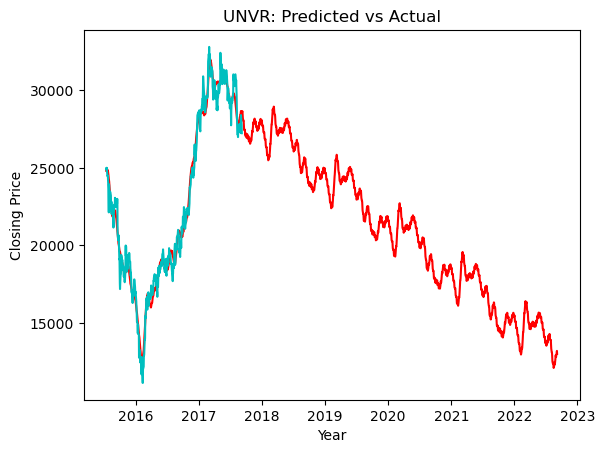

In [124]:
plt.plot(forecastam['ds'], forecastam['yhat'], 'r')
plt.plot(UNVR['ds'], UNVR['y'], 'c')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("UNVR: Predicted vs Actual")
plt.show()

# 3 Months Stocks Gain Comparison

In [125]:
columns3m = ['Emiten', 'Gain/Loss (%)']
data3m = [('ICBP',ICBP_3Months),('INDF',INDF_3Months),('ASII',ASII_3Months),('INTP',INTP_3Months),('GGRM',GGRM_3Months),
        ('AALI',AALI_3Months),('HMSP',HMSP_3Months),('LSIP',LSIP_3Months),('SMRA',SMRA_3Months),('PTBA',PTBA_3Months),
        ('BMRI',BMRI_3Months),('BBNI',BBNI_3Months),('ADHI',ADHI_3Months),('BBCA',BBCA_3Months),('TLKM',TLKM_3Months),
        ('ANTM',ANTM_3Months),('SMGR',SMGR_3Months),('CPIN',CPIN_3Months),('LPKR',LPKR_3Months),('INCO',INCO_3Months),
        ('AKRA',AKRA_3Months),('MNCN',MNCN_3Months),('WIKA',WIKA_3Months),('JSMR',JSMR_3Months),('ASRI',ASRI_3Months),
        ('ELSA',ELSA_3Months),('BSDE',BSDE_3Months),('MYRX',MYRX_3Months),('BBTN',BBTN_3Months),('PTPP',PTPP_3Months),
        ('PWON',PWON_3Months),('WSKT',WSKT_3Months),('SRIL',SRIL_3Months),('SSMS',SSMS_3Months),('BUMI',BUMI_3Months),
        ('PGAS',PGAS_3Months),('PPRO',PPRO_3Months),('UNVR',UNVR_3Months)]
df3m = pd.DataFrame(data3m, columns=columns3m)
df3m = df3m.sort_values(by='Gain/Loss (%)',ascending=False).reset_index(drop=True)
df3m.head(10)

,Emiten,Gain/Loss (%)
0,MYRX,72.973429
1,SMRA,42.913019
2,ELSA,40.419590
3,MNCN,23.043957
4,CPIN,23.033005
5,ANTM,22.138928
6,HMSP,20.014459
7,PTPP,19.525550
8,PGAS,17.004325
9,WIKA,14.175099


**The most profitable stock for 3 months based on forecast model is MYRX.**

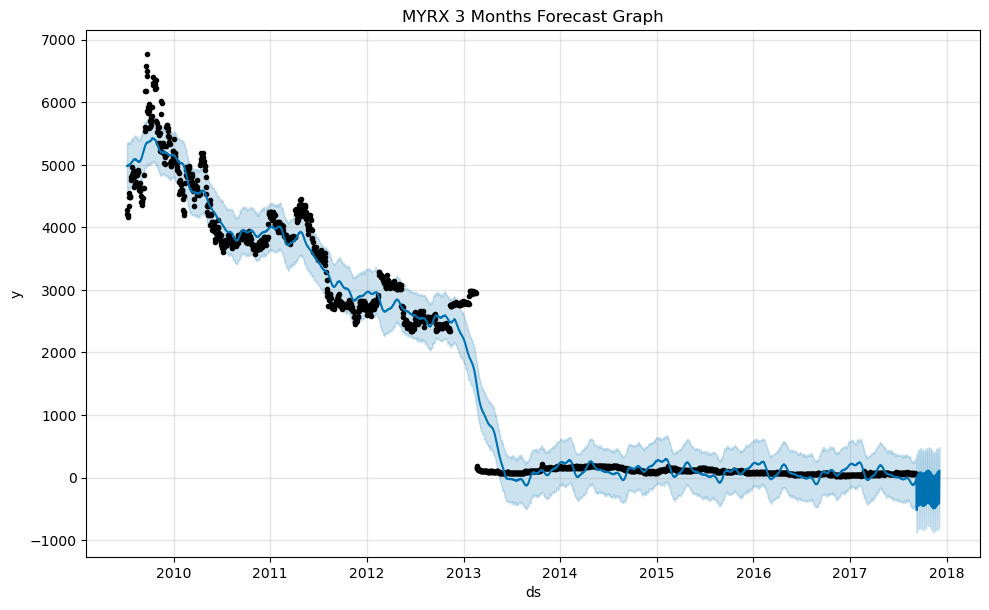

In [126]:
fig1 = ab.plot(forecastab.iloc[0:2145])
plt.title('MYRX 3 Months Forecast Graph')
plt.show()

# 1 Year Stocks Gain Comparison

In [127]:
columns1y = ['Emiten', 'Gain/Loss (%)']
data1y = [('ICBP',ICBP_1Year),('INDF',INDF_1Year),('ASII',ASII_1Year),('INTP',INTP_1Year),('GGRM',GGRM_1Year),
        ('AALI',AALI_1Year),('HMSP',HMSP_1Year),('LSIP',LSIP_1Year),('SMRA',SMRA_1Year),('PTBA',PTBA_1Year),
        ('BMRI',BMRI_1Year),('BBNI',BBNI_1Year),('ADHI',ADHI_1Year),('BBCA',BBCA_1Year),('TLKM',TLKM_1Year),
        ('ANTM',ANTM_1Year),('SMGR',SMGR_1Year),('CPIN',CPIN_1Year),('LPKR',LPKR_1Year),('INCO',INCO_1Year),
        ('AKRA',AKRA_1Year),('MNCN',MNCN_1Year),('WIKA',WIKA_1Year),('JSMR',JSMR_1Year),('ASRI',ASRI_1Year),
        ('ELSA',ELSA_1Year),('BSDE',BSDE_1Year),('MYRX',MYRX_1Year),('BBTN',BBTN_1Year),('PTPP',PTPP_1Year),
        ('PWON',PWON_1Year),('WSKT',WSKT_1Year),('SRIL',SRIL_1Year),('SSMS',SSMS_1Year),('BUMI',BUMI_1Year),
        ('PGAS',PGAS_1Year),('PPRO',PPRO_1Year),('UNVR',UNVR_1Year)]
df1y = pd.DataFrame(data1y, columns=columns1y)
df1y = df1y.sort_values(by='Gain/Loss (%)',ascending=False).reset_index(drop=True)
df1y.head(10)

,Emiten,Gain/Loss (%)
0,BUMI,60.295200
1,PWON,48.100852
2,ELSA,45.876647
3,SRIL,37.834677
4,SMRA,37.244280
5,HMSP,28.893221
6,MNCN,21.353261
7,ICBP,19.880031
8,CPIN,19.671143
9,GGRM,14.605908


**The most profitable stock for 1 year based on forecast model is BUMI.**

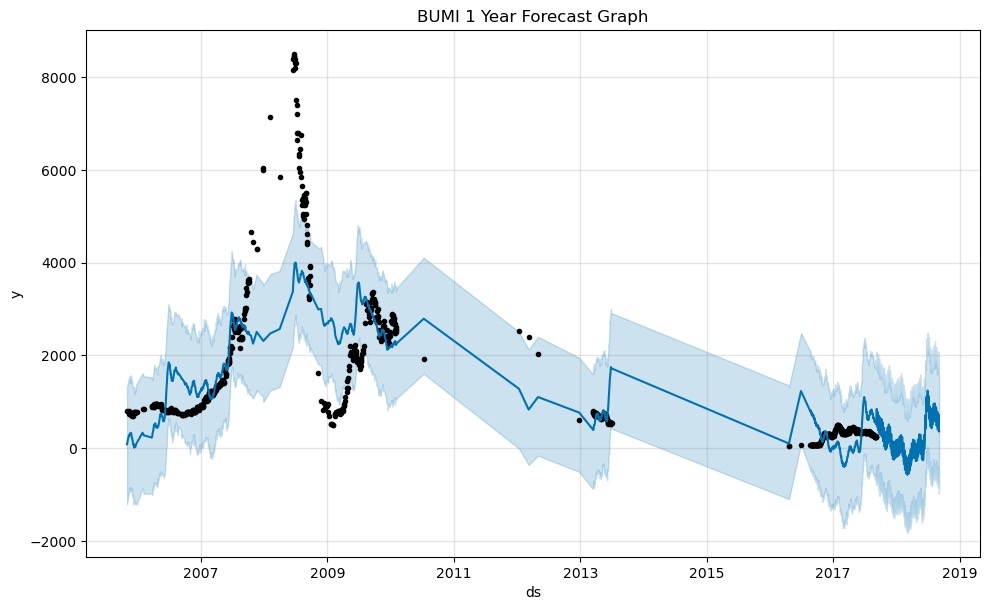

In [128]:
fig2 = aj.plot(forecastaj.iloc[0:1189])
plt.title('BUMI 1 Year Forecast Graph')
plt.show()

# 5 Year Stocks Gain Comparison

In [129]:
columns5y = ['Emiten', 'Gain/Loss (%)','Variance']
data5y = [('ICBP',ICBP_5Year,np.var(forecasta['yhat'])),('INDF',INDF_5Year,np.var(forecastb['yhat'])),
          ('ASII',ASII_5Year,np.var(forecastc['yhat'])),('INTP',INTP_5Year,np.var(forecastd['yhat'])),
          ('GGRM',GGRM_5Year,np.var(forecaste['yhat'])),('AALI',AALI_5Year,np.var(forecastf['yhat'])),
          ('HMSP',HMSP_5Year,np.var(forecastg['yhat'])),('LSIP',LSIP_5Year,np.var(forecasth['yhat'])),
          ('SMRA',SMRA_5Year,np.var(forecasti['yhat'])),('PTBA',PTBA_5Year,np.var(forecastj['yhat'])),
          ('BMRI',BMRI_5Year,np.var(forecastk['yhat'])),('BBNI',BBNI_5Year,np.var(forecastl['yhat'])),
          ('ADHI',ADHI_5Year,np.var(forecastm['yhat'])),('BBCA',BBCA_5Year,np.var(forecastn['yhat'])),
          ('TLKM',TLKM_5Year,np.var(forecasto['yhat'])),('ANTM',ANTM_5Year,np.var(forecastp['yhat'])),
          ('SMGR',SMGR_5Year,np.var(forecastq['yhat'])),('CPIN',CPIN_5Year,np.var(forecastr['yhat'])),
          ('LPKR',LPKR_5Year,np.var(forecasts['yhat'])),('INCO',INCO_5Year,np.var(forecastt['yhat'])),
          ('AKRA',AKRA_5Year,np.var(forecastu['yhat'])),('MNCN',MNCN_5Year,np.var(forecastv['yhat'])),
          ('WIKA',WIKA_5Year,np.var(forecastw['yhat'])),('JSMR',JSMR_5Year,np.var(forecastx['yhat'])),
          ('ASRI',ASRI_5Year,np.var(forecasty['yhat'])),('ELSA',ELSA_5Year,np.var(forecastz['yhat'])),
          ('BSDE',BSDE_5Year,np.var(forecastaa['yhat'])),('MYRX',MYRX_5Year,np.var(forecastab['yhat'])),
          ('BBTN',BBTN_5Year,np.var(forecastac['yhat'])),('PTPP',PTPP_5Year,np.var(forecastad['yhat'])),
          ('PWON',PWON_5Year,np.var(forecastaf['yhat'])),('WSKT',WSKT_5Year,np.var(forecastag['yhat'])),
          ('SRIL',SRIL_5Year,np.var(forecastah['yhat'])),('SSMS',SSMS_5Year,np.var(forecastai['yhat'])),
          ('BUMI',BUMI_5Year,np.var(forecastaj['yhat'])),('PGAS',PGAS_5Year,np.var(forecastak['yhat'])),
          ('PPRO',PPRO_5Year,np.var(forecastal['yhat'])),('UNVR',UNVR_5Year,np.var(forecastam['yhat']))]
df5y = pd.DataFrame(data5y, columns=columns5y)
df5y = df5y.sort_values(['Gain/Loss (%)','Variance'],ascending=[False,True]).reset_index(drop=True)
df5y.head(10)

,Emiten,Gain/Loss (%),Variance
0,SRIL,194.862901,7.152301e+04
1,PWON,188.002506,5.050134e+06
2,BBTN,97.679437,2.630269e+06
3,HMSP,86.552203,5.273819e+06
4,TLKM,77.445966,5.323914e+06
5,ICBP,74.740052,2.599626e+07
6,ANTM,56.807598,2.923588e+05
7,GGRM,55.662632,1.083230e+09
8,AKRA,46.077209,1.101799e+07
9,BBCA,34.383752,6.224849e+07


The risk is measured by variance. High variance in a stock is associated with higher risk while low variance is associated with lower risk. **The safest and most profitable stock for 5 year based on forecast model is SRIL.** SRIL has a higher possible gain while having a lower variance than PWON.

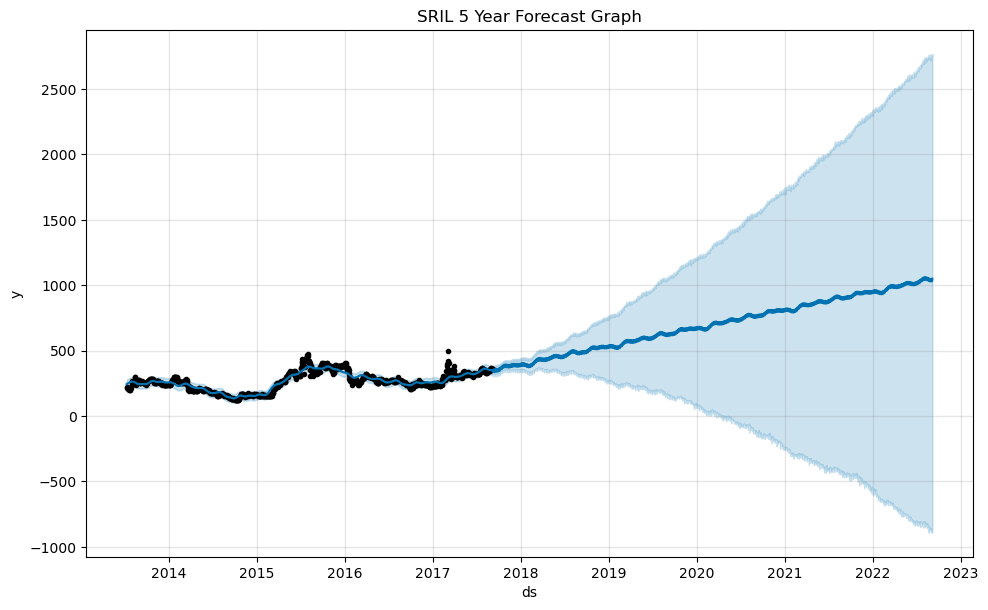

In [134]:
fig3 = ah.plot(forecastah)
plt.title('SRIL 5 Year Forecast Graph')
plt.show()